In [13]:
#all packages and dataframes
import numpy as np
import classification
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import colors as mcolors
from matplotlib.lines import Line2D
import matplotlib.patches as patches
sys.path.append('/Users/Alexis/Desktop/MSC_Alexis/analysis/code/mL_rsfMRI/Predictions')
import seperate_task as st
%matplotlib inline 
# Initialization of directory information:
thisDir = os.path.expanduser('~/Desktop/MSC_Alexis/analysis/')
outDir = thisDir + 'output/results/acc/'
subList=['MSC01','MSC02','MSC03','MSC04','MSC05','MSC06','MSC07','MSC10']
Parcel_params = classification.loadParcelParams('Gordon333',thisDir+'data/Parcel_info/')
taskList=['mem','glass','semantic','motor']
subDir = thisDir + 'output/results/subNetwork/'
randDir=thisDir + 'output/results/rdmNetwork/'
netList=['unassign','default', 'visual','fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon']
feature=[14808,10824,8736, 4620,5264,3151, 484, 4060, 2375,316, 564,45,21]
netRoi=dict([('unassign',14808),('default', 10824),('visual',8736),('fp', 4620),('dan',5264),('van',3151),('salience', 484),('co', 4060),('sm', 2375),('sm-lat', 316),('auditory', 564),('pmn',45),('pon',21)])
# Gordan Palette
enmax_palette = Parcel_params['net_colors']
color_codes_wanted = Parcel_params['networks']
cdict = dict(zip(color_codes_wanted, [mcolors.to_rgba(c) for c in enmax_palette]))
mcolors.get_named_colors_mapping().update(cdict)

#Same Task (Fig 1)
pairCV=pd.read_csv(outDir+'CV/acc.csv', usecols=[0,1,2])
t_DS=pd.read_csv(outDir+'DS/acc.csv', usecols=[0,1,2,3])
pairDS=pd.DataFrame()
for task in taskList:
    tmp=t_DS[(t_DS['task']==task)]
    tmp_mu=tmp.groupby(['train_sub']).mean()
    tmp_mu['task']=task
    pairDS=pd.concat([pairDS,tmp_mu])
pairDS.reset_index(inplace=True)
pairDS.rename(columns={'train_sub':'sub'},inplace=True)
pairDS['Analysis']='Different Person'
pairCV['Analysis']='Same Person'
pair_res=pd.concat([pairDS, pairCV])
#motor
pair_motor=pair_res[pair_res.task=='motor']
#mixed
pair_glass=pair_res[pair_res.task=='glass']
pair_sem=pair_res[pair_res.task=='semantic']
#memory
pair_mem=pair_res[pair_res.task=='mem']



#Different task (Fig 2)
SS_diff=pd.read_csv(outDir+'SS/stats.csv', usecols=[0,1,2,3])
SS_diff['analysis']='Same Person'
BS_diff=pd.read_csv(outDir+'BS/stats.csv', usecols=[0,1,2,3,4])
BS_diff['analysis']='Different Person'
diff_res=pd.concat([SS_diff, BS_diff])
#motor
diff_motor=diff_res[diff_res.train_task=='motor']
#mixed
diff_glass=diff_res[diff_res.train_task=='glass']
diff_sem=diff_res[diff_res.train_task=='semantic']
#memory
diff_mem=diff_res[diff_res.train_task=='mem']

#Make color palette
MSCList=['1','2','3','4','5','6','7','10']
MSC_colors=np.array([[0, 0, 0],[0.9, 0.9, 0],[0, 1, 0],[1, 0, 0],[0, 0, 1],[0.2, 1, 1],[1, 0, 1],[1, 0.5, 0]])
MSCdict=dict(zip(MSCList, [mcolors.to_rgba(m) for m in MSC_colors]))
mcolors.get_named_colors_mapping().update(MSCdict)

#adding thinner lines to different task analysis figure
t_SS=pd.read_csv(outDir+'SS/acc.csv',usecols=[0,1,2,3])
t_BS=pd.read_csv(outDir+'BS/acc.csv',usecols=[0,1,2,3,4])

pairBS=pd.DataFrame()
for task in taskList:
    for test_task in taskList:
        if task==test_task:
            continue
        else:
            tmp=t_BS[(t_BS.train_task==task)&(t_BS.test_task==test_task)]
            tmp_mu=tmp.groupby(['train_sub']).mean()
            tmp_mu['train_task']=task
            tmp_mu['test_task']=test_task
            pairBS=pd.concat([pairBS,tmp_mu])
pairBS.reset_index(inplace=True)
pairBS.rename(columns={'train_sub':'sub'},inplace=True)
pairBS['Analysis']='Different Person'


t_SS['Analysis']='Same Person'
DT_sep=pd.concat([pairBS, t_SS])

#motor
DT_motor=DT_sep[DT_sep.train_task=='motor']
DT_motor_sem=DT_motor[DT_motor.test_task=='semantic']
DT_motor_mem=DT_motor[DT_motor.test_task=='mem']
DT_motor_glass=DT_motor[DT_motor.test_task=='glass']
#glass
DT_glass=DT_sep[DT_sep.train_task=='glass']
DT_glass_sem=DT_glass[DT_glass.test_task=='semantic']
DT_glass_mot=DT_glass[DT_glass.test_task=='motor']
DT_glass_mem=DT_glass[DT_glass.test_task=='mem']
#semantic
DT_sem=DT_sep[DT_sep.train_task=='semantic']
DT_sem_glass=DT_sem[DT_sem.test_task=='glass']
DT_sem_mot=DT_sem[DT_sem.test_task=='motor']
DT_sem_mem=DT_sem[DT_sem.test_task=='mem']
#memory
DT_mem=DT_sep[DT_sep.train_task=='mem']
DT_mem_sem=DT_mem[DT_mem.test_task=='semantic']
DT_mem_mot=DT_mem[DT_mem.test_task=='motor']
DT_mem_glass=DT_mem[DT_mem.test_task=='glass']


#All tasks (Fig 5)
df=pd.read_csv(outDir+'ALL/LOO_acc.csv')
df_re=df.groupby(['train_sub']).mean()
df_re.rename(columns={'cv_acc':'Same Person','acc':'Different Person'},inplace=True)
df_re.reset_index(inplace=True)
res=pd.melt(df_re, id_vars=['train_sub'], value_vars=['Same Person','Different Person'],var_name='Analysis',value_name='acc')

sixty_days=pd.read_csv(thisDir+'output/results/permutation/ALL/manDays.csv')
sixty_days.rename(columns={'same_sub':'Same Person','diff_sub':'Different Person'},inplace=True)
sixty_res=pd.melt(sixty_days, id_vars=['Days'], value_vars=['Same Person', 'Different Person'],var_name='Analysis',value_name='acc')

#subnetwork mean 
BS_nets=pd.read_csv(subDir+'BS/acc.csv')
SS_nets=pd.read_csv(subDir+'SS/acc.csv')
DS_nets=pd.read_csv(subDir+'DS/acc.csv')
BS_nets=pd.read_csv(subDir+'BS/acc.csv')
ALL_nets=pd.read_csv(subDir+'ALL/acc.csv')
SS_nets.rename(columns={'Network':'feature','feature':'Network'},inplace=True)
DS_nets.rename(columns={'Network':'feature','feature':'Network'},inplace=True)
SS_net=SS_nets.groupby(['Network','feature']).mean()
BS_net=BS_nets.groupby(['Network','feature']).mean()
DS_net=DS_nets.groupby(['Network','feature']).mean()
ALL_net=ALL_nets.groupby(['Network','feature']).mean()
DS_net.reset_index(inplace=True)
SS_net.reset_index(inplace=True)
BS_net.reset_index(inplace=True)
ALL_net.reset_index(inplace=True)
#Feature selection (Fig 5)
#subnetworks overlapped with random network sampling
rand_DS=pd.read_csv(randDir+'DS/acc.csv')
rand_SS=pd.read_csv(randDir+'SS/acc.csv')
rand_BS=pd.read_csv(randDir+'BS/acc.csv')
rand_CV=pd.read_csv(randDir+'CV/acc.csv')
rand_ALL=pd.read_csv(randDir+'ALL/acc.csv')
#zscored subnetworks
CV_z=pd.read_csv(randDir+'CV/zscore_all.csv')
SS_z=pd.read_csv(randDir+'SS/zscore_all.csv')
DS_z=pd.read_csv(randDir+'DS/zscore_all.csv')
BS_z=pd.read_csv(randDir+'BS/zscore_all.csv')
ALL_z=pd.read_csv(randDir+'ALL/zscore_all.csv')
CV_z['Analysis']='Same Person'
SS_z['Analysis']='Same Person'
DS_z['Analysis']='Different Person'
BS_z['Analysis']='Different Person'

ST_z=pd.concat([CV_z, DS_z])
ST_z.drop(columns=['same_sub','mu','feature_y','std','diff_sub'],inplace=True)
ST_z = ST_z.sort_values(['feature_x'],ascending=False).reset_index(drop=True)
SS_zTemp=SS_z.rename(columns={'diff':'diff_sub'})
DT_z=pd.concat([SS_zTemp,BS_z])
DT_z = DT_z.sort_values(['feature'],ascending=False).reset_index(drop=True)
ALL=pd.read_csv(outDir+'/ALL/LOO_acc.csv')
ALL['clf']='Ridge'
#SS

SS=pd.read_csv(outDir+'SS/acc.csv')
BS=pd.read_csv(outDir+'BS/acc.csv')
#DS
DS=pd.read_csv(outDir+'DS/acc.csv')
#CV
CV=pd.read_csv(outDir+'CV/acc.csv')

BS['Analysis']='Different Person'
SS['Analysis']='Same Person'
DS['Analysis']='Different Person'
CV['Analysis']='Same Person'

BS['clf']='Ridge'
SS['clf']='Ridge'
DS['clf']='Ridge'
CV['clf']='Ridge'

SS.drop(columns=['train_task','test_task','sub','spec','sen'],inplace=True)
BS.drop(columns=['train_task','test_task','train_sub','test_sub','spec','sen'],inplace=True)
DS.drop(columns=['train_sub','test_sub','task','spec','sen'],inplace=True)
CV.drop(columns=['task','sub','spec','sen'],inplace=True)

LR_ALL=pd.read_csv(thisDir+'output/results/Log/acc/ALL/LOO_acc.csv')
LR_ALL['clf']='Log'
#SS
LR_SS=pd.read_csv(thisDir+'output/results/Log/acc/SS/acc.csv')
LR_BS=pd.read_csv(thisDir+'output/results/Log/acc/BS/acc.csv')
#DS
LR_DS=pd.read_csv(thisDir+'output/results/Log/acc/DS/acc.csv')
#CV
LR_CV=pd.read_csv(thisDir+'output/results/Log/acc/CV/acc.csv')

LR_BS['Analysis']='Different Person'
LR_SS['Analysis']='Same Person'
LR_DS['Analysis']='Different Person'
LR_CV['Analysis']='Same Person'

LR_BS['clf']='Log'
LR_SS['clf']='Log'
LR_DS['clf']='Log'
LR_CV['clf']='Log'

LR_SS.drop(columns=['train_task','test_task','sub','spec','sen'],inplace=True)
LR_BS.drop(columns=['train_task','test_task','train_sub','test_sub','spec','sen'],inplace=True)
LR_DS.drop(columns=['train_sub','test_sub','task','spec','sen'],inplace=True)
LR_CV.drop(columns=['task','sub','spec','sen'],inplace=True)

SVM_ALL=pd.read_csv('/Users/Alexis/Desktop/MSC_Alexis/analysis/output/results/SVM/acc/ALL/LOO_acc.csv')
SVM_ALL['clf']='SVM'
#SS
SVM_SS=pd.read_csv('/Users/Alexis/Desktop/MSC_Alexis/analysis/output/results/SVM/acc/SS/acc.csv')
SVM_BS=pd.read_csv('/Users/Alexis/Desktop/MSC_Alexis/analysis/output/results/SVM/acc/BS/acc.csv')
#DS
SVM_DS=pd.read_csv('/Users/Alexis/Desktop/MSC_Alexis/analysis/output/results/SVM/acc/DS/acc.csv')
#CV
SVM_CV=pd.read_csv('/Users/Alexis/Desktop/MSC_Alexis/analysis/output/results/SVM/acc/CV/acc.csv')

SVM_BS['Analysis']='Different Person'
SVM_SS['Analysis']='Same Person'
SVM_DS['Analysis']='Different Person'
SVM_CV['Analysis']='Same Person'

SVM_BS['clf']='SVM'
SVM_SS['clf']='SVM'
SVM_DS['clf']='SVM'
SVM_CV['clf']='SVM'

SVM_SS.drop(columns=['train_task','test_task','sub','spec','sen'],inplace=True)
SVM_BS.drop(columns=['train_task','test_task','train_sub','test_sub','spec','sen'],inplace=True)
SVM_DS.drop(columns=['train_sub','test_sub','task','spec','sen'],inplace=True)
SVM_CV.drop(columns=['task','sub','spec','sen'],inplace=True)

diffTask=pd.concat([SS,BS, LR_SS, LR_BS,SVM_SS,SVM_BS])
sameTask=pd.concat([CV,DS, LR_CV, LR_DS,SVM_CV,SVM_DS])
allAnalysis=pd.concat([ALL, LR_ALL,SVM_ALL])
allAnalysis.drop(columns=['cv_sen','cv_spec','ds_sen','ds_spec'],inplace=True)
allAnalysis.rename(columns={'acc':'Different Person','cv_acc':'Same Person'},inplace='True')
allAnalysis=pd.melt(allAnalysis,id_vars=['train_sub','test_sub','clf'],value_vars=['Different Person','Same Person'],var_name='Analysis',value_name='acc')


ALL=pd.read_csv(outDir+'ALL/LOO_acc.csv')
ALL.rename(columns={'cv_acc':'Same Person','acc':'Different Person'},inplace=True)
ALL.reset_index(inplace=True)
ALL_heat=pd.melt(ALL, id_vars=['train_sub','test_sub'], value_vars=['Same Person','Different Person'],var_name='Analysis',value_name='acc')
same_all=ALL_heat[ALL_heat.Analysis=='Same Person']
diff_all=ALL_heat[ALL_heat.Analysis=='Different Person']
diff_all.drop(columns=['Analysis'], inplace=True)
same_all.drop(columns=['Analysis','test_sub'], inplace=True)
same_all.drop_duplicates(inplace=True)
diff_all=diff_all.pivot(index='test_sub', columns='train_sub', values='acc')
same_all=same_all.groupby(['train_sub']).mean()
same_all.reset_index(inplace=True)
same_all['test_sub']=same_all['train_sub']
same_all=same_all.pivot(index='test_sub', columns='train_sub', values='acc')



#rand_CV.groupby('features').agg(lambda x: np.percentile(x['acc'], q = 5))
# 50th Percentile
def p5(x):
    return np.percentile(x,5)

# 90th Percentile
def p95(x):
    return np.percentile(x,95)

percentiles_CV=rand_DS.groupby(['feature']).agg({'same_sub': [p5, p95]})
percentiles_CV.columns = percentiles_CV.columns.droplevel()
percentiles_CV.reset_index(inplace=True)

percentiles_DS=rand_DS.groupby(['feature']).agg({'diff_sub': [p5, p95]})
percentiles_DS.columns = percentiles_DS.columns.droplevel()
percentiles_DS.reset_index(inplace=True)


percentiles_SS=rand_SS.groupby(['feature']).agg({'diff': [p5, p95]})
percentiles_SS.columns = percentiles_SS.columns.droplevel()
percentiles_SS.reset_index(inplace=True)

percentiles_BS=rand_BS.groupby(['feature']).agg({'diff_sub': [p5, p95]})
percentiles_BS.columns = percentiles_BS.columns.droplevel()
percentiles_BS.reset_index(inplace=True)


percentiles_ALL_DS=rand_ALL.groupby(['feature']).agg({'diff_sub': [p5, p95]})#different sub DS
percentiles_ALL_DS.columns = percentiles_ALL_DS.columns.droplevel()
percentiles_ALL_DS.reset_index(inplace=True)

percentiles_ALL_SS=rand_ALL.groupby(['feature']).agg({'same_sub': [p5, p95]})#same sub SS
percentiles_ALL_SS.columns = percentiles_ALL_SS.columns.droplevel()
percentiles_ALL_SS.reset_index(inplace=True)

percentiles_manDays=sixty_res.groupby(['Days','Analysis']).agg({'acc': [p5, p95]})
percentiles_manDays.columns = percentiles_manDays.columns.droplevel()
percentiles_manDays.reset_index(inplace=True)


diff_percent=percentiles_manDays[percentiles_manDays.Analysis=='Different Person']
same_percent=percentiles_manDays[percentiles_manDays.Analysis=='Same Person']




#manipulating frames
CV_permutations=pd.read_csv(thisDir+'output/results/permutation/CV/frames.csv')
BS_permutations=pd.read_csv(thisDir+'output/results/permutation/BS/frames.csv')
SS_permutations=pd.read_csv(thisDir+'output/results/permutation/SS/frames.csv')
DS_permutations=pd.read_csv(thisDir+'output/results/permutation/DS/frames.csv')
#just so there isn't some weird decrease cutoff from lack of samples due to lack of size of files 
CV_permutations=CV_permutations[(CV_permutations['frames']<300)]
BS_permutations=BS_permutations[(BS_permutations['frames']<300)]
SS_permutations=SS_permutations[(SS_permutations['frames']<300)]
DS_permutations=DS_permutations[(DS_permutations['frames']<300)]

CV_permutations['Time']=(CV_permutations['frames']*2.2)/60
BS_permutations['Time']=(BS_permutations['frames']*2.2)/60
SS_permutations['Time']=(SS_permutations['frames']*2.2)/60
DS_permutations['Time']=(DS_permutations['frames']*2.2)/60


CV_percentiles=CV_permutations.groupby(['Time']).agg({'acc': [p5, p95]})
CV_percentiles.columns = CV_percentiles.columns.droplevel()
CV_percentiles.reset_index(inplace=True)

BS_percentiles=BS_permutations.groupby(['Time']).agg({'acc': [p5, p95]})
BS_percentiles.columns = BS_percentiles.columns.droplevel()
BS_percentiles.reset_index(inplace=True)


SS_percentiles=SS_permutations.groupby(['Time']).agg({'acc': [p5, p95]})
SS_percentiles.columns = SS_percentiles.columns.droplevel()
SS_percentiles.reset_index(inplace=True)

DS_percentiles=DS_permutations.groupby(['Time']).agg({'acc': [p5, p95]})
DS_percentiles.columns = DS_percentiles.columns.droplevel()
DS_percentiles.reset_index(inplace=True)


#training one session all subs testing left out sub
groupwise=thisDir+'output/results/groupAvg/allTasks_acc.csv'
groupAvg=pd.read_csv(groupwise)
mL_mean=groupAvg.mean()
#training tasks split up same leave one sub out analysis
CVGroup=pd.read_csv(thisDir+'output/results/groupAvg/acc.csv')
CV=pd.read_csv(outDir+'CV/stats.csv')
CV_Stand_app=CVGroup[['train_task','train_acc']]
CV_Stand_app.rename(columns={'train_task':'task','train_acc':'acc'},inplace=True)
CV.rename(columns={'Mean':'acc'},inplace=True)
CV.drop(columns={'Std'},inplace=True)
CV['Analysis']='Same Subject'
DS=pd.read_csv(outDir+'DS/stats.csv')
DS.rename(columns={'Mean':'acc'},inplace=True)
DS.drop(columns={'Std'},inplace=True)
DS['Analysis']='Different Subject'
CV_Stand_app['Analysis']='Groupwise Approach'
comp_CV=pd.concat([CV,CV_Stand_app, DS])

#pca 50% var explained num components increase exponentially
pc50File='/Users/Alexis/Desktop/MSC_Alexis/analysis/output/results/acc/ALL/pca50_acc.csv'
pc50=pd.read_csv(pc50File)
#calculating percentiles for pc
DSpc_percentiles=pc50.groupby(['numComponent']).agg({'acc': [p5, p95]})
DSpc_percentiles.columns = DSpc_percentiles.columns.droplevel()
DSpc_percentiles.reset_index(inplace=True)

CVpc_percentiles=pc50.groupby(['numComponent']).agg({'cv_acc': [p5, p95]})
CVpc_percentiles.columns = CVpc_percentiles.columns.droplevel()
CVpc_percentiles.reset_index(inplace=True)




#pca 50% var explained num components increase exponentially
pcvarFile='/Users/Alexis/Desktop/MSC_Alexis/analysis/output/results/acc/ALL/pcaVarChange_acc.csv'
pcvar=pd.read_csv(pcvarFile)
#calculating percentiles for pc
DSpcvar_percentiles=pcvar.groupby(['var']).agg({'acc': [p5, p95]})
DSpcvar_percentiles.columns = DSpcvar_percentiles.columns.droplevel()
DSpcvar_percentiles.reset_index(inplace=True)

CVpcvar_percentiles=pcvar.groupby(['var']).agg({'cv_acc': [p5, p95]})
CVpcvar_percentiles.columns = CVpcvar_percentiles.columns.droplevel()
CVpcvar_percentiles.reset_index(inplace=True)



group=pd.read_csv('/Users/Alexis/Desktop/MSC_Alexis/analysis/output/results/acc/ALL/GroupNet/acc.csv')
ind=pd.read_csv('/Users/Alexis/Desktop/MSC_Alexis/analysis/output/results/acc/ALL/IndNet/acc.csv')



df_group=group.groupby(['train_sub']).mean()
df_group.rename(columns={'cv_acc':'Same Person','acc':'Different Person'},inplace=True)
df_group.reset_index(inplace=True)
group=pd.melt(df_group, id_vars=['train_sub'], value_vars=['Same Person','Different Person'],var_name='Analysis',value_name='acc')


df_ind=ind.groupby(['train_sub']).mean()
df_ind.rename(columns={'cv_acc':'Same Person','acc':'Different Person'},inplace=True)
df_ind.reset_index(inplace=True)
ind=pd.melt(df_ind, id_vars=['train_sub'], value_vars=['Same Person','Different Person'],var_name='Analysis',value_name='acc')

SVM_MC=pd.read_csv('/Users/Alexis/Desktop/MSC_Alexis/analysis/output/results/SVM/acc/ALL/multiclass_acc.csv')
Log_MC=pd.read_csv('/Users/Alexis/Desktop/MSC_Alexis/analysis/output/results/Log/acc/ALL/multiclass_acc.csv')
Log_MC.drop(columns=['Task','f1','MCC'],inplace=True)
Log_MC.drop_duplicates(inplace=False)
Log_MC['clf']='Log'
SVM_MC.drop(columns=['Task','f1','MCC'],inplace=True)
SVM_MC.drop_duplicates(inplace=False)
SVM_MC['clf']='SVM'
multi=pd.read_csv(outDir+'ALL/multiclass_acc.csv')
mc=multi[['train','same_sub','diff_sub']]
mc.rename(columns={'same_sub':'Same Person','diff_sub':'Different Person'},inplace=True)
multiclass=pd.melt(mc,id_vars=['train'],value_vars=['Same Person','Different Person'],var_name='Analysis',value_name='acc')
F_score=multi[['train','rest_CV','mem_CV','sem_CV','mot_CV','glass_CV','rest_DS','mem_DS','sem_DS','mot_DS','glass_DS']]
F1=pd.melt(F_score, id_vars=['train'], value_vars=['rest_CV','mem_CV','sem_CV','mot_CV','glass_CV','rest_DS','mem_DS','sem_DS','mot_DS','glass_DS'],var_name='Analysis',value_name='f')
task=F1['Analysis'].str.split("_", n=1, expand=True)
F1['Task']=task[0]
F1['analysis']=task[1]
F1.drop(columns=['Analysis'],inplace=True)
#finalDS,finalCV=st.multiclassAll()
multiclass['clf']='Ridge'
MC_all=pd.concat([multiclass, SVM_MC, Log_MC])
CVGroup=pd.read_csv(thisDir+'output/results/groupAvg/acc.csv')
CVStats=pd.read_csv(outDir+'CV/stats.csv')
CV_Stand_app=CVGroup[['train_task','train_acc']]
CV_Stand_app.rename(columns={'train_task':'task','train_acc':'acc'},inplace=True)
CVStats.rename(columns={'Mean':'acc'},inplace=True)
CVStats.drop(columns={'Std'},inplace=True)
CVStats['Analysis']='Same Person'
DSStats=pd.read_csv(outDir+'DS/stats.csv')
DSStats.rename(columns={'Mean':'acc'},inplace=True)
DSStats.drop(columns={'Std'},inplace=True)
DSStats['Analysis']='Different Person'
CV_Stand_app['Analysis']='Groupwise Approach'
comp_CV=pd.concat([CVStats,CV_Stand_app, DSStats])
groupAvg=pd.read_csv(thisDir+'output/results/groupAvg/allTasksnoRestSplit_acc.csv')
mL_mean=groupAvg.mean()

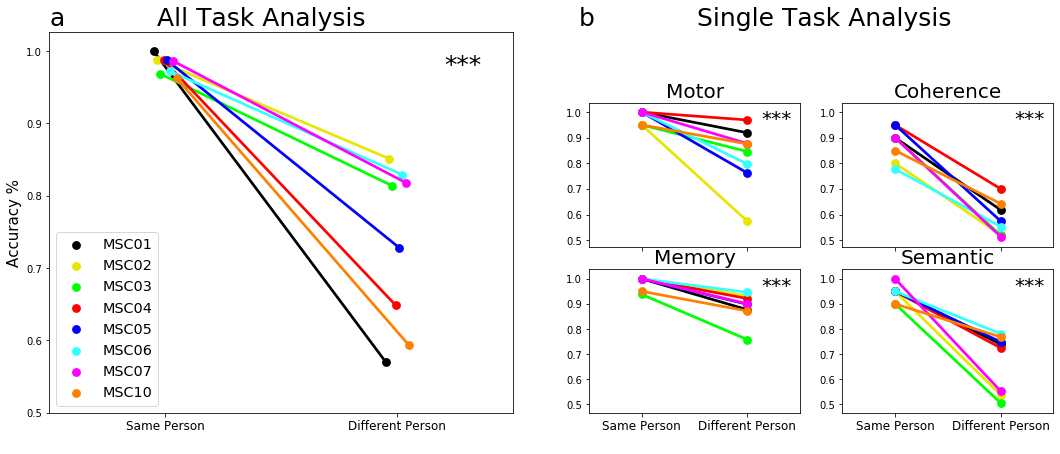

In [11]:
#Same Task (Fig 1)
#fig=plt.figure(figsize=(15,7), constrained_layout=True)
#plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 3 columns
#gs = gridspec.GridSpec(nrows=3, ncols=4)#, wspace=.2)#, hspace=.3)#,height_ratios=[3,3,3])

fig = plt.figure(figsize=(15,7),constrained_layout=False)
gs00 = fig.add_gridspec(nrows=2, ncols=1, left=0.05, right=0.48,
                        wspace=0.05)

gs01 = fig.add_gridspec(nrows=3, ncols=2, left=0.55, right=0.98,height_ratios=[1,3,3])
#gs0 = fig.add_gridspec(1, 2)
#gs00 = gs0[0].subgridspec(1,1)
#gs01 = gs0[1].subgridspec(3, 2)

fig.text(.05, .893, 'a',fontsize=25)
fig.text(.54, .893, 'b',fontsize=25)
fig.text(.15, .893, 'All Task Analysis',fontsize=25)
fig.text(.65, .893, 'Single Task Analysis',fontsize=25)


ax0=fig.add_subplot(gs00[0:,0])#:2])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub", ax=ax0,ci=None, data=res, dodge=.1,order=['Same Person','Different Person'],color='r', palette=['1','2','3','4','5','6','7','10'])
plt.text(1.2, .97, '***',fontsize=25)
#ax.set_title('All Tasks', fontsize=20, pad=10)
y=[.5,.6,.7,.8,.9,1.0]
plt.yticks(y)
plt.ylabel("Accuracy %", fontsize=15)
plt.legend(loc='lower left',fontsize='x-large')
plt.xlabel(' ')
ax.tick_params('x',labelsize=12)
#motor
ax1=fig.add_subplot(gs01[1,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="sub", ci=None, data=pair_motor, ax=ax1, order=['Same Person','Different Person'], color='r', palette=['1','2','3','4','5','6','7','10'])
plt.text(1.13, .95, '***',fontsize=20)
ax.legend_.remove()
ax.set_title('Motor', fontsize=20, pad=5)
plt.xlabel('')
plt.ylabel(' ')
plt.setp(ax1.get_xticklabels(), visible=False)
#mixed
ax2=fig.add_subplot(gs01[1,1],sharey=ax1)
#plt.setp(ax2.get_yticklabels(), visible=False)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub", ci=None, data=pair_glass, ax=ax2, order=['Same Person','Different Person'], color='r', palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
plt.text(1.13, .95, '***',fontsize=20)
ax.set_title('Coherence', fontsize=20, pad=5)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.ylabel('')
plt.xlabel('')
#memory
ax3=fig.add_subplot(gs01[2,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="sub", ci=None, data=pair_mem,ax=ax3, order=['Same Person','Different Person'], color='r', palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
ax.set_title('Memory', fontsize=20, pad=5)
plt.ylabel(' ')
plt.xlabel(' ')
plt.text(1.13, .95, '***',fontsize=20)
ax4=fig.add_subplot(gs01[2,1],sharey=ax3)
ax.tick_params('x',labelsize=12)
#plt.setp(ax4.get_yticklabels(), visible=False)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub", ci=None, data=pair_sem,ax=ax4, order=['Same Person','Different Person'], color='r', palette=['1','2','3','4','5','6','7','10'])
ax.set_title('Semantic', fontsize=20, pad=5)
plt.ylabel('')
plt.xlabel('')
plt.text(1.13, .95, '***',fontsize=20)
ax.legend_.remove()
ax.tick_params('x',labelsize=12)

"""

CV=pd.read_csv(outDir+'CV/acc.csv')
grouped_CV=CV.groupby('task')
#diff sub same task 
df=pd.read_csv(outDir+'DS/acc.csv')
grouped_df=df.groupby('task')

ax0=fig.add_subplot(gs00[1,0])
ax=sns.heatmap(same_all, annot=True, vmin=.5, vmax=1, cmap="Blues",ax=ax0,fmt=".1g",square=True,linewidths=5,linecolor='black',cbar=False)
ax=sns.heatmap(diff_all, annot=True, vmin=.5, vmax=1,cmap="Blues",ax=ax0,fmt=".1g",square=True,cbar_kws = dict(anchor=(16, 0)))
ax.set_title('All Tasks',fontsize=20, pad=10)
ax.set_xlabel('Training', fontsize=15,labelpad=15)
ax.set_ylabel('Testing', fontsize=15,labelpad=15)

for task in taskList:
    #Same sub same task
    task_CV=grouped_CV.get_group(task)
    task_CV.drop(columns=['task'], inplace=True)
    task_CV['test_sub']=task_CV['sub']
    task_CV=task_CV.pivot(index='test_sub', columns='sub', values='acc')
    #Diff sub same task
    task_df=grouped_df.get_group(task)
    task_df.drop(columns=['task'], inplace=True)
    task_df=task_df.pivot(index='test_sub', columns='train_sub', values='acc')
    
    if task=='glass':
        ax1=fig.add_subplot(gs01[3,1])
        ax=sns.heatmap(task_CV, annot=True, vmin=.5, vmax=1, cmap="Blues",ax=ax1,fmt=".1g",square=True,linewidths=5,linecolor='black',cbar=False)
        ax=sns.heatmap(task_df, annot=True, vmin=.5, vmax=1,cmap="Blues",ax=ax1,fmt=".1g",square=True,cbar=False)
        ax.set_title('Coherence',fontsize=20, pad=10)
        ax.set_xlabel(' ', fontsize=15,labelpad=15)
        ax.set_ylabel('', fontsize=15,labelpad=15)
        plt.setp(ax1.get_xticklabels(), visible=False)
    elif task=='motor':
        ax2=fig.add_subplot(gs01[3,0])
        ax=sns.heatmap(task_CV, annot=True, vmin=.5, vmax=1, cmap="Blues",ax=ax2,fmt=".1g",square=True,linewidths=5,linecolor='black',cbar=False)
        ax=sns.heatmap(task_df, annot=True, vmin=.5, vmax=1, cmap="Blues",ax=ax2,fmt=".1g",square=True,cbar=False)
        ax.set_title('Motor',fontsize=20, pad=10)
        ax.set_xlabel(' ', fontsize=15,labelpad=15)
        ax.set_ylabel('', fontsize=15,labelpad=15)
        plt.setp(ax2.get_xticklabels(), visible=False)
    elif task=='semantic':
        ax3=fig.add_subplot(gs01[4,1])
        ax=sns.heatmap(task_CV, annot=True, vmin=.5, vmax=1, cmap="Blues",ax=ax3,fmt=".1g",square=True,linewidths=5,linecolor='black',cbar=False)
        ax=sns.heatmap(task_df, annot=True, vmin=.5, vmax=1, cmap="Blues",ax=ax3,fmt=".1g",square=True,cbar=False)
        ax.set_title('Semantic',fontsize=20, pad=10)
        ax.set_xlabel('', fontsize=15,labelpad=15)
        ax.set_ylabel('', fontsize=15,labelpad=15)
    else:
        ax4=fig.add_subplot(gs01[4,0])
        ax=sns.heatmap(task_CV, annot=True, vmin=.5, vmax=1, cmap="Blues",ax=ax4,fmt=".1g",square=True,linewidths=5,linecolor='black',cbar=False)
        ax=sns.heatmap(task_df, annot=True, vmin=.5, vmax=1, cmap="Blues",ax=ax4,fmt=".1g",square=True,cbar=False)
        ax.set_title('Memory',fontsize=20, pad=10)
        ax.set_xlabel('', fontsize=15,labelpad=15)
        ax.set_ylabel('', fontsize=15,labelpad=15)
"""
plt.savefig(thisDir+'output/FigsFinal/ALL_CVDS_point_plots.png', bbox_inches='tight')
#*** p<.001 **p<.01 *p<.05



In [ ]:
#CV-SS (Fig 3)
CV=pd.read_csv(outDir+'CV/acc.csv',usecols=[0,1,2])
BS=pd.read_csv(outDir+'BS/acc.csv', usecols=[0,1,2,3,4])
SS=pd.read_csv(outDir+'SS/acc.csv', usecols=[0,1,2,3])
DS=pd.read_csv(outDir+'DS/acc.csv', usecols=[0,1,2,3])
CV.rename(columns={'task':'train_task'},inplace=True)
DS.rename(columns={'task':'train_task'},inplace=True)
SS_task=SS.merge(CV, how='left', on=['train_task','sub'],suffixes=('_Diff','_Same'))
OS_task=BS.merge(DS,how='left',on=['train_task','train_sub','test_sub'],suffixes=('','_DS'))
SS_task.rename(columns={'acc_Diff':'Diff','acc_Same':'Same'},inplace=True)
OS_task.rename(columns={'acc':'Diff','acc_DS':'Same'},inplace=True)

#CV m SS
#train motor test memory 
motTmem=SS_task[(SS_task['train_task']=='motor')& (SS_task['test_task']=='mem')]
motTmem.drop(columns=['train_task','test_task'],inplace=True)
motTmem=pd.melt(motTmem, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')
#train motor test semantic 
motTsem=SS_task[(SS_task['train_task']=='motor')& (SS_task['test_task']=='semantic')]
motTsem.drop(columns=['train_task','test_task'],inplace=True)
motTsem=pd.melt(motTsem, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')
#train motor test glass
motTglass=SS_task[(SS_task['train_task']=='motor')& (SS_task['test_task']=='glass')]
motTglass.drop(columns=['train_task','test_task'],inplace=True)
motTglass=pd.melt(motTglass, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

#train memory test memory 
memTmot=SS_task[(SS_task['train_task']=='mem')& (SS_task['test_task']=='motor')]
memTmot.drop(columns=['train_task','test_task'],inplace=True)
memTmot=pd.melt(memTmot, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')
#train memory test semantic 
memTsem=SS_task[(SS_task['train_task']=='mem')& (SS_task['test_task']=='semantic')]
memTsem.drop(columns=['train_task','test_task'],inplace=True)
memTsem=pd.melt(memTsem, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')
#train memory test glass
memTglass=SS_task[(SS_task['train_task']=='mem')& (SS_task['test_task']=='glass')]
memTglass.drop(columns=['train_task','test_task'],inplace=True)
memTglass=pd.melt(memTglass, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

#train glass test motor 
glassTmot=SS_task[(SS_task['train_task']=='glass')& (SS_task['test_task']=='motor')]
glassTmot.drop(columns=['train_task','test_task'],inplace=True)
glassTmot=pd.melt(glassTmot, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')
#train glass test semantic 
glassTsem=SS_task[(SS_task['train_task']=='glass')& (SS_task['test_task']=='semantic')]
glassTsem.drop(columns=['train_task','test_task'],inplace=True)
glassTsem=pd.melt(glassTsem, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')
#train glass test memory
glassTmem=SS_task[(SS_task['train_task']=='glass')& (SS_task['test_task']=='mem')]
glassTmem.drop(columns=['train_task','test_task'],inplace=True)
glassTmem=pd.melt(glassTmem, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

#train semantic test motor 
semTmot=SS_task[(SS_task['train_task']=='semantic')& (SS_task['test_task']=='motor')]
semTmot.drop(columns=['train_task','test_task'],inplace=True)
semTmot=pd.melt(semTmot, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')
#train semantic test glass
semTglass=SS_task[(SS_task['train_task']=='semantic')& (SS_task['test_task']=='glass')]
semTglass.drop(columns=['train_task','test_task'],inplace=True)
semTglass=pd.melt(semTglass, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')
#train semantic test memory
semTmem=SS_task[(SS_task['train_task']=='semantic')& (SS_task['test_task']=='mem')]
semTmem.drop(columns=['train_task','test_task'],inplace=True)
semTmem=pd.melt(semTmem, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

 
#All trained on semantic merging testing tasks
semanticAll=pd.concat([semTmem, semTmot, semTglass])
#Motor
motorAll=pd.concat([motTmem, motTsem, motTglass])
#Memory
memAll=pd.concat([memTsem, memTmot, memTglass])
#Glass
glassAll=pd.concat([glassTmem, glassTmot, glassTsem])

#Comparing same sub same task v diff task (Fig 2)
fig=plt.figure(figsize=(10,10), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
gs = gridspec.GridSpec(nrows=2, ncols=2,wspace=.2,hspace=.3)
#Broad overview of changing from same task to diff task
#All Glass

fig.text(.13, .893, 'A.',fontsize=20)
fig.text(.55, .893, 'B.',fontsize=20)
fig.text(.13, .465, 'C.',fontsize=20)
fig.text(.55, .465, 'D.',fontsize=20)

ax1=fig.add_subplot(gs[0,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=motorAll, ax=ax1)
ax.set_title('Motor',fontsize=20, pad=10)
ax.set(xlabel='')
plt.ylabel('Accuracy %',fontsize=15)
plt.text(1.13, .95, '***',fontsize=20)
ax.legend_.remove()
position=(0,1)
labels=("Same Task","Different Task")
plt.xticks(position,labels)
plt.setp(ax1.get_xticklabels(), visible=False)
ax.tick_params(labelsize=15)
#All Memory
ax2=fig.add_subplot(gs[0,1],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=glassAll, ax=ax2)
ax.set_title('Coherence',fontsize=20, pad=10)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()

position=(0,1)
labels=("Same Task","Different Task")
plt.xticks(position,labels)
plt.setp(ax2.get_xticklabels(), visible=False)
ax.tick_params(labelsize=15)
#all Motor
ax3=fig.add_subplot(gs[1,0],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=memAll, ax=ax3)
ax.set_title('Memory',fontsize=20, pad=10)
plt.xlabel('Same Person',fontsize=15)
plt.ylabel('Accuracy %',fontsize=15)
ax.legend_.remove()
position=(0,1)
labels=("Same Task","Different Task")
plt.xticks(position,labels)
plt.legend(loc='lower left',fontsize='x-large')
ax.tick_params(labelsize=15)
plt.text(1.2, .95, '*',fontsize=20)
#all semantic
ax4=fig.add_subplot(gs[1,1],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=semanticAll,ax=ax4)
ax.set_title('Semantic',fontsize=20, pad=10)
plt.xlabel('Same Person', fontsize=15)
ax.set(ylabel='')
position=(0,1)
labels=("Same Task","Different Task")
plt.xticks(position,labels)
ax.legend_.remove()
ax.tick_params(labelsize=15)
plt.text(1.18, .95, '**',fontsize=20)
#plt.savefig('/Users/Alexis/Documents/Conferences/CNS2021//condensed_CVmSS_plots.png', bbox_inches='tight')
plt.savefig(thisDir+'output/FigsFinal/condensed_CVmSS_plots.png', bbox_inches='tight')


#*** p<.001 **p<.01 *p<.05


In [ ]:
#Fig 3
#Different Task (fig 2)
#need to add lines for individual Persons
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='green', lw=4),
               Line2D([0], [0], color='red', lw=4)]
#Create figure space
fig=plt.figure(figsize=(10,10), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 3 columns
gs = gridspec.GridSpec(nrows=2, ncols=2, wspace=.2, hspace=.3)

fig.text(.13, .893, 'A.',fontsize=20)
fig.text(.55, .893, 'B.',fontsize=20)
fig.text(.13, .465, 'C.',fontsize=20)
fig.text(.55, .465, 'D.',fontsize=20)

#Motor
ax2=fig.add_subplot(gs[0,0])
#plt.setp(ax2.get_xticklabels(), visible=False)
ax=sns.pointplot(x="analysis",y="Mean", hue="test_task",  palette=['red','blue','green'],ci=None, data=diff_motor, ax=ax2)
ax.legend_.remove()
g=sns.pointplot(x="Analysis",y="acc", hue="sub",order=['Same Person','Different Person'], ci=None,scale=.05, data=DT_motor_sem, palette=['green'],ax=ax2)
g.legend_.remove()
g2=sns.pointplot(x="Analysis",y="acc", hue="sub",order=['Same Person','Different Person'], ci=None,scale=.05, data=DT_motor_mem, palette=['blue'],ax=ax2)
g2.legend_.remove()
g3=sns.pointplot(x="Analysis",y="acc", hue="sub",order=['Same Person','Different Person'], ci=None,scale=.05, data=DT_motor_glass, palette=['red'],ax=ax2)
g3.legend_.remove()
ax.set_title('$Motor$', fontsize=20, pad=10)
ax.set(xlabel=' ')
#y=[.5,.75,1.0]
#plt.yticks(y)
plt.ylabel("Accuracy %",fontsize=15)
plt.setp(ax2.get_xticklabels(), visible=False)
ax.tick_params(labelsize=15)
#Glass
ax1=fig.add_subplot(gs[0,1],sharey=ax2)
#plt.setp(ax2.get_yticklabels(), visible=False)
ax=sns.pointplot(x="analysis",y="Mean", hue="test_task", palette=['blue','orange','green'],ci=None, data=diff_glass, ax=ax1)
#plt.setp(ax1.get_xticklabels(), visible=False)
ax.legend_.remove()
g=sns.pointplot(x="Analysis",y="acc", hue="sub",order=['Same Person','Different Person'], ci=None,scale=.05, data=DT_glass_sem, palette=['green'],ax=ax1)
g.legend_.remove()
g2=sns.pointplot(x="Analysis",y="acc", hue="sub",order=['Same Person','Different Person'], ci=None,scale=.05, data=DT_glass_mem, palette=['blue'],ax=ax1)
g2.legend_.remove()
g3=sns.pointplot(x="Analysis",y="acc", hue="sub",order=['Same Person','Different Person'], ci=None,scale=.05, data=DT_glass_mot, palette=['orange'],ax=ax1)
g3.legend_.remove()
ax.set(ylabel=' ')
ax.set_title('$Coherence$', fontsize=20, pad=10)
ax.set(xlabel=' ')
#ax.legend(custom_lines, ['Motor', 'Memory', 'Semantic','Coherence'],loc='upper right',fontsize='medium',bbox_to_anchor=(1.5, 1),title='Testing Variables')
plt.setp(ax1.get_xticklabels(), visible=False)
ax.tick_params(labelsize=15)
#Memory
ax3=fig.add_subplot(gs[1,0])
ax=sns.pointplot(x="analysis",y="Mean", hue="test_task",  palette=['red','orange','green'],ci=None, data=diff_mem, ax=ax3)
ax.legend_.remove()
g=sns.pointplot(x="Analysis",y="acc", hue="sub",order=['Same Person','Different Person'], ci=None,scale=.05, data=DT_mem_sem, palette=['green'],ax=ax3)
g.legend_.remove()
g2=sns.pointplot(x="Analysis",y="acc", hue="sub",order=['Same Person','Different Person'], ci=None,scale=.05, data=DT_mem_glass, palette=['red'],ax=ax3)
g2.legend_.remove()
g3=sns.pointplot(x="Analysis",y="acc", hue="sub",order=['Same Person','Different Person'], ci=None,scale=.05, data=DT_mem_mot, palette=['orange'],ax=ax3)
g3.legend_.remove()
ax.set_title('$Memory$', fontsize=20, pad=10)

ax.tick_params(labelsize=15)
#y=[.5,.75,1.0]
#plt.yticks(y)
plt.xlabel(' ')
#plt.xlabel('Different Task', fontsize=15)
plt.ylabel("Accuracy %",fontsize=15)
#Semantic
ax4=fig.add_subplot(gs[1,1],sharey=ax3)
#plt.setp(ax4.get_yticklabels(), visible=False)
ax=sns.pointplot(x="analysis",y="Mean", hue="test_task", ci=None, palette=['red','blue','orange'], data=diff_sem, ax=ax4)
g=sns.pointplot(x="Analysis",y="acc", hue="sub",order=['Same Person','Different Person'], ci=None,scale=.05, data=DT_sem_glass, palette=['red'],ax=ax4)
g.legend_.remove()
g2=sns.pointplot(x="Analysis",y="acc", hue="sub",order=['Same Person','Different Person'], ci=None,scale=.05, data=DT_sem_mem, palette=['blue'],ax=ax4)
g2.legend_.remove()
g3=sns.pointplot(x="Analysis",y="acc", hue="sub",order=['Same Person','Different Person'], ci=None,scale=.05, data=DT_sem_mot, palette=['orange'],ax=ax4)
g3.legend_.remove()
ax.set_title('$Semantic$', fontsize=20, pad=10)
#plt.xlabel('Different Task', fontsize=15)
ax.set(ylabel=' ')
plt.xlabel(' ')
ax.legend(custom_lines, ['Motor', 'Memory', 'Semantic','Coherence'],loc='upper right',fontsize='large',title='Testing Variables')

ax.tick_params(labelsize=15)
plt.savefig(thisDir+'output/FigsFinal/SSBS_point_plots.png', bbox_inches='tight')


#plt.savefig('/Users/Alexis/Documents/Conferences/CNS2021/SSBS_point_plots.png', bbox_inches='tight')
plt.savefig(thisDir+'output/FigsFinal/SSBS_point_plots.png', bbox_inches='tight')

In [ ]:
#Feature selection compared to null (Fig 5)
fig=plt.figure(figsize=(9,7), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 2 rows by 2 columns
gs = gridspec.GridSpec(nrows=2, ncols=2, wspace=.2, hspace=.3)
fig.text(.13, .9, 'a',fontsize=10)
#fig.text(.33, .9, 'B.',fontsize=10)
fig.text(.54, .9, 'b',fontsize=10)
fig.text(.12, .472, 'c',fontsize=10)
#fig.text(.33, .472, 'E.',fontsize=10)
fig.text(.54, .472, 'd',fontsize=10)
#ALL

ax0=fig.add_subplot(gs[0,0])
ax = sns.lineplot(x="feature", y='same_sub',data=rand_ALL, ci=None, ax=ax0)
g=sns.scatterplot(x='feature', y='same_sub', hue='Network', data=ALL_net, ax=ax0, color='r',legend=False,s=50,hue_order=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'],palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.fill_between(percentiles_ALL_SS['feature'],percentiles_ALL_SS['p5'],percentiles_ALL_SS['p95'],alpha=.2)
ax.set(xscale="log")
plt.xlabel('')
ax.set_ylabel("Accuracy %")
ax.set(ylim=(.5, 1.05),xlim=(10,50000))
ax.set_title('Same Person All Task',fontsize=10, pad=10)

ax00=fig.add_subplot(gs[1,0])
ax = sns.lineplot(x="feature", y='diff_sub',data=rand_ALL, ci=None,ax=ax00)
g=sns.scatterplot(x='feature', y='diff_sub', hue='Network', data=ALL_net, ax=ax00, color='r',legend=False,s=50,hue_order=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'],palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.fill_between(percentiles_ALL_DS['feature'],percentiles_ALL_DS['p5'],percentiles_ALL_DS['p95'],alpha=.2)
ax.set_title('Different Person All Task',fontsize=10, pad=10)
ax.set(ylim=(.5, 1.05),xlim=(10,50000))
ax.set_ylabel("Accuracy %")
ax.set(xscale="log")
plt.xlabel('Feature Size')

#CV
ax1=fig.add_subplot(gs[0,1])
ax = sns.lineplot(x="feature", y='same_sub',ci=None,data=rand_DS, ax=ax1)
ax.fill_between(percentiles_CV['feature'],percentiles_CV['p5'],percentiles_CV['p95'],alpha=.2)
ax.set(xscale="log")
CV_z.rename(columns={'network':'Network'},inplace=True)
g=sns.scatterplot(x='feature', y='same_sub', hue='Network', data=DS_net, ax=ax1, color='r',s=50,hue_order=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'],palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.set_title('Same Person Same Task',fontsize=10, pad=10)
ax.set_ylabel(" ", fontsize=25)
ax.set_xlabel('')
ax.set(ylim=(.5, 1.05),xlim=(10,50000))
#ax.tick_params(labelsize=25,pad=15)
plt.legend(title=None,markerscale=1, bbox_to_anchor=(1.2, .75),fontsize=15)
#DS
ax2=fig.add_subplot(gs[1,1])
ax = sns.lineplot(x="feature", y='diff_sub',ci=None,data=rand_DS, ax=ax2)
ax.fill_between(percentiles_DS['feature'],percentiles_DS['p5'],percentiles_DS['p95'],alpha=.2)
ax.set(xscale="log")
g=sns.scatterplot(x='feature', y='diff_sub', hue='Network', data=DS_net, ax=ax2, color='r',legend=False,s=50,hue_order=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'],palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.set_title('Different Person Same Task',fontsize=10, pad=10)
ax.set_ylabel(" ", fontsize=25)
plt.xlabel('',fontsize=25)
ax.set(ylim=(.5, 1.05),xlim=(10,50000))
#ax.tick_params(labelsize=25,pad=15)
"""
#SS
ax3=fig.add_subplot(gs[1,1],sharey=ax2)
ax = sns.lineplot(x="feature", y='diff',ci=None,data=rand_SS, ax=ax3)
ax.fill_between(percentiles_SS['feature'],percentiles_SS['p5'],percentiles_SS['p95'],alpha=.2)
ax.set(xscale="log")
g=sns.scatterplot(x='feature', y='diff', hue='Network', data=SS_net, ax=ax3, color='r',legend=False,s=50,hue_order=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'],palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.set_title('Same Person Different Task',fontsize=10, pad=10)
ax.set_ylabel('')
plt.xlabel('Feature Size')
ax.set(ylim=(.5, 1.05),xlim=(10,50000))
#ax.tick_params(labelsize=25,pad=15)

#BS
ax4=fig.add_subplot(gs[1,2])
ax = sns.lineplot(x="feature", y='diff_sub',ci=None,data=rand_BS, ax=ax4)
ax.fill_between(percentiles_BS['feature'],percentiles_BS['p5'],percentiles_BS['p95'],alpha=.2)
ax.set(xscale="log")
g=sns.scatterplot(x='feature', y='diff_sub', hue='Network', data=BS_z, ax=ax4, color='r',s=50,legend=False,hue_order=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'],palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.set_title('Different Person Different Task',fontsize=10, pad=10)
ax.set_ylabel('')
plt.xlabel('Feature Size')
ax.set(ylim=(.5, 1.05),xlim=(10,50000))
#ax.tick_params(labelsize=25,pad=15)

"""


plt.savefig(thisDir+'output/FigsFinal/feature_plots.png', bbox_inches='tight')





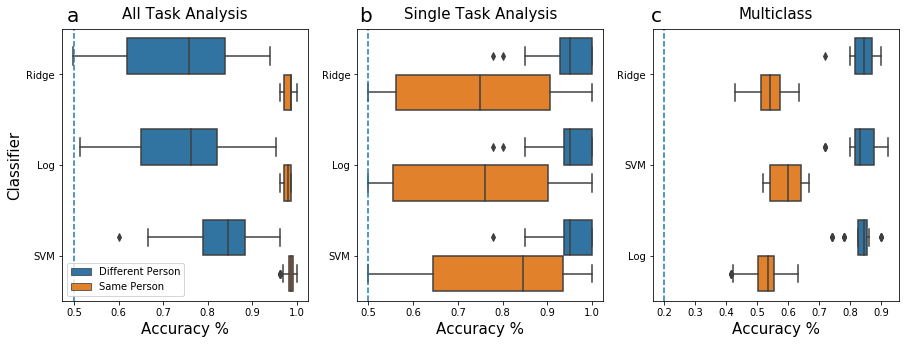

In [24]:
#Supplemental Figures
#S1
fig=plt.figure(figsize=(15,5), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
fig.text(.13, .9, 'a',fontsize=20)
fig.text(.4, .9, 'b',fontsize=20)
fig.text(.67, .9, 'c',fontsize=20)
#this is the model comparison for BS CV SS and DS
#Add grid space for subplots 1 rows by 2 columns
gs = gridspec.GridSpec(nrows=1, ncols=3,wspace=.2, hspace=.3)

ax0=fig.add_subplot(gs[0,0])
ax=sns.boxplot(x='acc',y='clf',hue='Analysis',data=allAnalysis,orient='h',ax=ax0)
ax.set_title('All Task Analysis',fontsize=15, pad=10)
plt.xlabel('Accuracy %',fontsize=15)
plt.ylabel('Classifier',fontsize=15)
#ax0.legend_.remove()
ax0.axvline(.5, ls='--')
ax0.legend(loc='lower left',fontsize=10)
ax1=fig.add_subplot(gs[0,1])
sns.boxplot(x='acc',y='clf',hue='Analysis',data=sameTask,orient='h',ax=ax1)
ax1.set_title('Single Task Analysis',fontsize=15, pad=10)
plt.xlabel('Accuracy %', fontsize=15)
plt.ylabel('Classifier')
ax1.legend_.remove()
ax1.axvline(.5, ls='--')
plt.ylabel(' ')

ax2=fig.add_subplot(gs[0,2])
sns.boxplot(x='acc',y='clf',hue='Analysis',data=MC_all,orient='h',ax=ax2,hue_order=['Same Person','Different Person'])
ax2.set_title('Multiclass',fontsize=15, pad=10)
plt.xlabel('Accuracy %',fontsize=15)
plt.ylabel(' ')
ax2.axvline(.2, ls='--')
ax2.legend_.remove()
#ax2.legend(loc='upper right',fontsize=10,bbox_to_anchor=(1.6, 1.0))

plt.savefig(thisDir+'output/FigsFinal/clf_comp_plots.png', bbox_inches='tight')


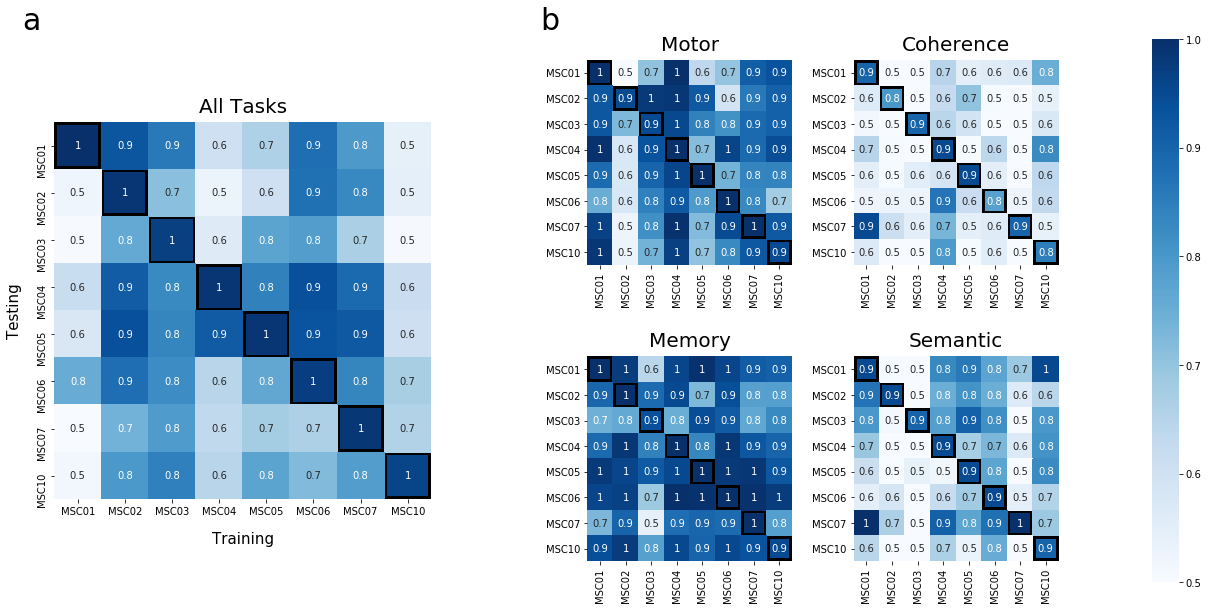

In [16]:
#S2
fig=plt.figure(figsize=(18,10), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True

fig.text(.1, .893, 'a',fontsize=30)
fig.text(.5, .893, 'b',fontsize=30)
#fig.text(.24, .42, 'C.',fontsize=20)
#fig.text(.64, .42, 'D.',fontsize=20)

#Add grid space for subplots 1 rows by 2 columns
gs = gridspec.GridSpec(nrows=2, ncols=4, wspace=.3, hspace=.2)
#Comparison to the same sub same task performance
CV=pd.read_csv(outDir+'CV/acc.csv')
grouped_CV=CV.groupby('task')
#diff sub same task 
df=pd.read_csv(outDir+'DS/acc.csv')
grouped_df=df.groupby('task')

ax0=fig.add_subplot(gs[0:,:2])
ax=sns.heatmap(same_all, annot=True, vmin=.5, vmax=1, cmap="Blues",ax=ax0,fmt=".1g",square=True,linewidths=5,linecolor='black',cbar=False)
ax=sns.heatmap(diff_all, annot=True, vmin=.5, vmax=1,cmap="Blues",ax=ax0,fmt=".1g",square=True,cbar_kws = dict(anchor=(16, 0)))
ax.set_title('All Tasks',fontsize=20, pad=10)
ax.set_xlabel('Training', fontsize=15,labelpad=15)
ax.set_ylabel('Testing', fontsize=15,labelpad=15)

for task in taskList:
    #Same sub same task
    task_CV=grouped_CV.get_group(task)
    task_CV.drop(columns=['task'], inplace=True)
    task_CV['test_sub']=task_CV['sub']
    task_CV=task_CV.pivot(index='test_sub', columns='sub', values='acc')
    #Diff sub same task
    task_df=grouped_df.get_group(task)
    task_df.drop(columns=['task'], inplace=True)
    task_df=task_df.pivot(index='test_sub', columns='train_sub', values='acc')
    
    if task=='glass':
        ax1=fig.add_subplot(gs[0,3])
        ax=sns.heatmap(task_CV, annot=True, vmin=.5, vmax=1, cmap="Blues",ax=ax1,fmt=".1g",square=True,linewidths=5,linecolor='black',cbar=False)
        ax=sns.heatmap(task_df, annot=True, vmin=.5, vmax=1,cmap="Blues",ax=ax1,fmt=".1g",square=True,cbar=False)
        ax.set_title('Coherence',fontsize=20, pad=10)
        ax.set_xlabel(' ', fontsize=15,labelpad=15)
        ax.set_ylabel('', fontsize=15,labelpad=15)
    elif task=='motor':
        ax2=fig.add_subplot(gs[0,2])
        ax=sns.heatmap(task_CV, annot=True, vmin=.5, vmax=1, cmap="Blues",ax=ax2,fmt=".1g",square=True,linewidths=5,linecolor='black',cbar=False)
        ax=sns.heatmap(task_df, annot=True, vmin=.5, vmax=1, cmap="Blues",ax=ax2,fmt=".1g",square=True,cbar=False)
        ax.set_title('Motor',fontsize=20, pad=10)
        ax.set_xlabel(' ', fontsize=15,labelpad=15)
        ax.set_ylabel('', fontsize=15,labelpad=15)
    elif task=='semantic':
        ax3=fig.add_subplot(gs[1,3])
        ax=sns.heatmap(task_CV, annot=True, vmin=.5, vmax=1, cmap="Blues",ax=ax3,fmt=".1g",square=True,linewidths=5,linecolor='black',cbar=False)
        ax=sns.heatmap(task_df, annot=True, vmin=.5, vmax=1, cmap="Blues",ax=ax3,fmt=".1g",square=True,cbar=False)
        ax.set_title('Semantic',fontsize=20, pad=10)
        ax.set_xlabel('', fontsize=15,labelpad=15)
        ax.set_ylabel('', fontsize=15,labelpad=15)
    else:
        ax4=fig.add_subplot(gs[1,2])
        ax=sns.heatmap(task_CV, annot=True, vmin=.5, vmax=1, cmap="Blues",ax=ax4,fmt=".1g",square=True,linewidths=5,linecolor='black',cbar=False)
        ax=sns.heatmap(task_df, annot=True, vmin=.5, vmax=1, cmap="Blues",ax=ax4,fmt=".1g",square=True,cbar=False)
        ax.set_title('Memory',fontsize=20, pad=10)
        ax.set_xlabel('', fontsize=15,labelpad=15)
        ax.set_ylabel('', fontsize=15,labelpad=15)

#plt.savefig('/Users/Alexis/Documents/Conferences/CNS2021/sub_comp_heatplots.png', bbox_inches='tight')
 

plt.savefig(thisDir+'output/FigsFinal/sub_comp_heatplots.png', bbox_inches='tight')


In [ ]:
#supp fig 3
#cv - ss
SS_broken=pd.read_csv(outDir+'SS/separate_broken_acc.csv')
SS_condensed=SS_broken[['train_task','sub','Same Task','Different Task']]
SS_final=pd.melt(SS_condensed, id_vars=['sub','train_task'], value_vars=['Different Task', 'Same Task'],var_name='Analysis', value_name='acc')

y=[0,.5,1.0]
#train motor test memory 
motTmem=SS_broken[(SS_broken['train_task']=='motor')& (SS_broken['test_task']=='mem')]
motTmem.drop(columns=['train_task','test_task'],inplace=True)
motTmem=motTmem.groupby('sub').mean()
motTmem.reset_index(inplace=True)
motTmem=pd.melt(motTmem, id_vars=['sub'], value_vars=['Different Task', 'Same Task'],var_name='Analysis', value_name='acc')

#train motor test semantic 
motTsem=SS_broken[(SS_broken['train_task']=='motor')& (SS_broken['test_task']=='semantic')]
motTsem.drop(columns=['train_task','test_task'],inplace=True)
motTsem=motTsem.groupby('sub').mean()
motTsem.reset_index(inplace=True)
motTsem=pd.melt(motTsem, id_vars=['sub'], value_vars=['Different Task', 'Same Task'],var_name='Analysis', value_name='acc')


#train motor test glass
motTglass=SS_broken[(SS_broken['train_task']=='motor')& (SS_broken['test_task']=='glass')]
motTglass.drop(columns=['train_task','test_task'],inplace=True)
motTglass=motTglass.groupby('sub').mean()
motTglass.reset_index(inplace=True)
motTglass=pd.melt(motTglass, id_vars=['sub'], value_vars=['Different Task', 'Same Task'],var_name='Analysis', value_name='acc')

#train memory test memory 
memTmot=SS_broken[(SS_broken['train_task']=='mem')& (SS_broken['test_task']=='motor')]
memTmot.drop(columns=['train_task','test_task'],inplace=True)
memTmot=memTmot.groupby('sub').mean()
memTmot.reset_index(inplace=True)
memTmot=pd.melt(memTmot, id_vars=['sub'], value_vars=['Different Task', 'Same Task'],var_name='Analysis', value_name='acc')

#train memory test semantic 
memTsem=SS_broken[(SS_broken['train_task']=='mem')& (SS_broken['test_task']=='semantic')]
memTsem.drop(columns=['train_task','test_task'],inplace=True)
memTsem=memTsem.groupby('sub').mean()
memTsem.reset_index(inplace=True)
memTsem=pd.melt(memTsem, id_vars=['sub'], value_vars=['Different Task', 'Same Task'],var_name='Analysis', value_name='acc')

#train memory test glass
memTglass=SS_broken[(SS_broken['train_task']=='mem')& (SS_broken['test_task']=='glass')]
memTglass.drop(columns=['train_task','test_task'],inplace=True)
memTglass=memTglass.groupby('sub').mean()
memTglass.reset_index(inplace=True)
memTglass=pd.melt(memTglass, id_vars=['sub'], value_vars=['Different Task', 'Same Task'],var_name='Analysis', value_name='acc')

#train glass test motor 
glassTmot=SS_broken[(SS_broken['train_task']=='glass')& (SS_broken['test_task']=='motor')]
glassTmot.drop(columns=['train_task','test_task'],inplace=True)
glassTmot=glassTmot.groupby('sub').mean()
glassTmot.reset_index(inplace=True)
glassTmot=pd.melt(glassTmot, id_vars=['sub'], value_vars=['Different Task', 'Same Task'],var_name='Analysis', value_name='acc')

#train glass test semantic 
glassTsem=SS_broken[(SS_broken['train_task']=='glass')& (SS_broken['test_task']=='semantic')]
glassTsem.drop(columns=['train_task','test_task'],inplace=True)
glassTsem=glassTsem.groupby('sub').mean()
glassTsem.reset_index(inplace=True)
glassTsem=pd.melt(glassTsem, id_vars=['sub'], value_vars=['Different Task', 'Same Task'],var_name='Analysis', value_name='acc')

#train glass test memory
glassTmem=SS_broken[(SS_broken['train_task']=='glass')& (SS_broken['test_task']=='mem')]
glassTmem.drop(columns=['train_task','test_task'],inplace=True)
glassTmem=pd.melt(glassTmem, id_vars=['sub'], value_vars=['Different Task', 'Same Task'],var_name='Analysis', value_name='acc')

#train semantic test motor 
semTmot=SS_broken[(SS_broken['train_task']=='semantic')& (SS_broken['test_task']=='motor')]
semTmot.drop(columns=['train_task','test_task'],inplace=True)
semTmot=semTmot.groupby('sub').mean()
semTmot.reset_index(inplace=True)
semTmot=pd.melt(semTmot, id_vars=['sub'], value_vars=['Different Task', 'Same Task'],var_name='Analysis', value_name='acc')

#train semantic test glass
semTglass=SS_broken[(SS_broken['train_task']=='semantic')& (SS_broken['test_task']=='glass')]
semTglass.drop(columns=['train_task','test_task'],inplace=True)
semTglass=semTglass.groupby('sub').mean()
semTglass.reset_index(inplace=True)
semTglass=pd.melt(semTglass, id_vars=['sub'], value_vars=['Different Task', 'Same Task'],var_name='Analysis', value_name='acc')

#train semantic test memory
semTmem=SS_broken[(SS_broken['train_task']=='semantic')& (SS_broken['test_task']=='mem')]
semTmem.drop(columns=['train_task','test_task'],inplace=True)
semTmem=semTmem.groupby('sub').mean()
semTmem.reset_index(inplace=True)
semTmem=pd.melt(semTmem, id_vars=['sub'], value_vars=['Different Task', 'Same Task'],var_name='Analysis', value_name='acc')
#y=[.5,.75,1.0]
#Different Task task 
fig=plt.figure(figsize=(12,10), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 3 columns
gs = gridspec.GridSpec(nrows=4, ncols=4)
fig.suptitle('Testing', fontsize=25, fontweight='bold')
fig.text(-0.08, 0.5, 'Training', va='center', fontweight='bold',fontsize=25,rotation='vertical')

#Semantic test memory
ax1=fig.add_subplot(gs[0,1])
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same Task','Different Task'],ci=None, data=semTmem, ax=ax1)
ax.set_title('Memory',fontsize=20, pad=10)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
ax.set(ylim=(0, 1.05))
#ax1.text(1.1, .85, '***',fontsize=18)
#plt.setp(ax1.get_yticklabels(), visible=False)
plt.setp(ax1.get_xticklabels(), visible=False)
ax.tick_params(labelsize=10)
plt.yticks(y)
#Semantic test Motor
ax2=fig.add_subplot(gs[0,2],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same Task','Different Task'],ci=None, data=semTmot, ax=ax2)
ax.set_title('Motor', fontsize=20, pad=10)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
#ax2.text(1.1, .85, '***',fontsize=18)
ax.tick_params(labelsize=10)
#Semantic test glass
ax3=fig.add_subplot(gs[0,3],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same Task','Different Task'],ci=None, data=semTglass, ax=ax3)
ax.set_title('Coherence', fontsize=20, pad=10)
plt.legend(bbox_to_anchor=(1.8, 1.0),loc='upper right',fontsize='x-large')
ax.set(xlabel='')
ax.set(ylabel='')
plt.setp(ax3.get_yticklabels(), visible=False)
plt.setp(ax3.get_xticklabels(), visible=False)
#ax3.text(1.1, .85, '***',fontsize=18)
ax.tick_params(labelsize=10)
#Memory test semantic
ax4=fig.add_subplot(gs[1,0],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same Task','Different Task'],ci=None, data=memTsem, ax=ax4)
ax.set_ylabel('Memory', rotation=0, fontsize=20, labelpad=55)
ax.set(xlabel='')
ax.legend_.remove()
plt.setp(ax4.get_xticklabels(), visible=False)
ax.set(ylim=(0, 1.05))
#plt.yticks(y)
ax.tick_params(labelsize=10)
#ax4.text(1.2, .85, '**',fontsize=18)

#Memory test motor
ax6=fig.add_subplot(gs[1,2], sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same Task','Different Task'],ci=None, data=memTmot, ax=ax6)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax6.get_yticklabels(), visible=False)
ax.tick_params(labelsize=10)
plt.setp(ax6.get_xticklabels(), visible=False)
#Memory test glass
ax7=fig.add_subplot(gs[1,3], sharey=ax4)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same Task','Different Task'],ci=None, data=memTglass, ax=ax7)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax7.get_yticklabels(), visible=False)
plt.setp(ax7.get_xticklabels(), visible=False)
#ax7.text(1.2, .85, '**',fontsize=18)
ax.tick_params(labelsize=10)
#Motor test semantic
ax8=fig.add_subplot(gs[2,0],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same Task','Different Task'],ci=None, data=motTsem, ax=ax8)
ax.set_ylabel('Motor', rotation=0, fontsize=20, labelpad=50)
ax.set(xlabel='')
ax.legend_.remove()
ax.tick_params(labelsize=10)
ax.set(ylim=(0, 1.05))
ax8.text(1.2, .85, '*',fontsize=20)
#plt.yticks(y)
plt.setp(ax8.get_xticklabels(), visible=False)
ax.tick_params(labelsize=10)
#motor test mem
ax9=fig.add_subplot(gs[2,1],sharey=ax8)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same Task','Different Task'],ci=None, data=motTmem, ax=ax9)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax9.get_yticklabels(), visible=False)
plt.setp(ax9.get_xticklabels(), visible=False)
#ax9.text(1.1, .85, '***',fontsize=18)
ax.tick_params(labelsize=10)
#motor test glass
ax11=fig.add_subplot(gs[2,3],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same Task','Different Task'],ci=None, data=motTglass, ax=ax11)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax11.get_yticklabels(), visible=False)
plt.setp(ax11.get_xticklabels(), visible=False)
#ax11.text(1.1, .85, '***',fontsize=18)
ax.tick_params(labelsize=10)
#glass test semantic
ax12=fig.add_subplot(gs[3,0],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same Task','Different Task'],ci=None, data=glassTsem, ax=ax12)
ax.set_ylabel('Coherence', rotation=0, fontsize=20, labelpad=60)
ax.set(xlabel='')
ax.legend_.remove()
ax.set(ylim=(0, 1.05))
#plt.yticks(y)
ax.tick_params(labelsize=10)

#glass test mem
ax13=fig.add_subplot(gs[3,1],sharey=ax12)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same Task','Different Task'],ci=None, data=glassTmem, ax=ax13)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax13.get_yticklabels(), visible=False)
ax.tick_params(labelsize=10)
#ax13.text(1.2, .85, '**',fontsize=18)

#glass test motor
ax14=fig.add_subplot(gs[3,2],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same Task','Different Task'],ci=None, data=glassTmot, ax=ax14)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax14.get_yticklabels(), visible=False)
ax.tick_params(labelsize=10)
#plt.xticks(rotation=-10,fontsize=15)
#ax14.text(1.1, .85, '***',fontsize=18)
#* train mem test glass 
#** mem semantic and motor glass and semantic motor 
#***  semantic mem and semantix glass and glass test all 
fig.text(.16, .893, 'Semantic',fontsize=20)
fig.text(-.03, .8, 'Semantic',fontsize=20)
plt.savefig(thisDir+'output/FigsFinal/SS_broken_sepTask_plots.png', bbox_inches='tight')



#p<.05 * p<.01 ** p<.001 ***

In [ ]:
#Fig S4
#DSmBS (Fig 4)
#train motor test memory 
motTmem=OS_task[(OS_task['train_task']=='motor')& (OS_task['test_task']=='mem')]
motTmem.drop(columns=['train_task','test_task'],inplace=True)
motTmem=motTmem.groupby('train_sub').mean()
motTmem.reset_index(inplace=True)
motTmem=pd.melt(motTmem, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

#train motor test semantic 
motTsem=OS_task[(OS_task['train_task']=='motor')& (OS_task['test_task']=='semantic')]
motTsem.drop(columns=['train_task','test_task'],inplace=True)
motTsem=motTsem.groupby('train_sub').mean()
motTsem.reset_index(inplace=True)
motTsem=pd.melt(motTsem, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')


#train motor test glass
motTglass=OS_task[(OS_task['train_task']=='motor')& (OS_task['test_task']=='glass')]
motTglass.drop(columns=['train_task','test_task'],inplace=True)
motTglass=motTglass.groupby('train_sub').mean()
motTglass.reset_index(inplace=True)
motTglass=pd.melt(motTglass, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

#train memory test memory 
memTmot=OS_task[(OS_task['train_task']=='mem')& (OS_task['test_task']=='motor')]
memTmot.drop(columns=['train_task','test_task'],inplace=True)
memTmot=memTmot.groupby('train_sub').mean()
memTmot.reset_index(inplace=True)
memTmot=pd.melt(memTmot, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

#train memory test semantic 
memTsem=OS_task[(OS_task['train_task']=='mem')& (OS_task['test_task']=='semantic')]
memTsem.drop(columns=['train_task','test_task'],inplace=True)
memTsem=memTsem.groupby('train_sub').mean()
memTsem.reset_index(inplace=True)
memTsem=pd.melt(memTsem, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

#train memory test glass
memTglass=OS_task[(OS_task['train_task']=='mem')& (OS_task['test_task']=='glass')]
memTglass.drop(columns=['train_task','test_task'],inplace=True)
memTglass=memTglass.groupby('train_sub').mean()
memTglass.reset_index(inplace=True)
memTglass=pd.melt(memTglass, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

#train glass test motor 
glassTmot=OS_task[(OS_task['train_task']=='glass')& (OS_task['test_task']=='motor')]
glassTmot.drop(columns=['train_task','test_task'],inplace=True)
glassTmot=glassTmot.groupby('train_sub').mean()
glassTmot.reset_index(inplace=True)
glassTmot=pd.melt(glassTmot, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

#train glass test semantic 
glassTsem=OS_task[(OS_task['train_task']=='glass')& (OS_task['test_task']=='semantic')]
glassTsem.drop(columns=['train_task','test_task'],inplace=True)
glassTsem=glassTsem.groupby('train_sub').mean()
glassTsem.reset_index(inplace=True)
glassTsem=pd.melt(glassTsem, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

#train glass test memory
glassTmem=OS_task[(OS_task['train_task']=='glass')& (OS_task['test_task']=='mem')]
glassTmem.drop(columns=['train_task','test_task'],inplace=True)
glassTmem=pd.melt(glassTmem, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

#train semantic test motor 
semTmot=OS_task[(OS_task['train_task']=='semantic')& (OS_task['test_task']=='motor')]
semTmot.drop(columns=['train_task','test_task'],inplace=True)
semTmot=semTmot.groupby('train_sub').mean()
semTmot.reset_index(inplace=True)
semTmot=pd.melt(semTmot, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

#train semantic test glass
semTglass=OS_task[(OS_task['train_task']=='semantic')& (OS_task['test_task']=='glass')]
semTglass.drop(columns=['train_task','test_task'],inplace=True)
semTglass=semTglass.groupby('train_sub').mean()
semTglass.reset_index(inplace=True)
semTglass=pd.melt(semTglass, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

#train semantic test memory
semTmem=OS_task[(OS_task['train_task']=='semantic')& (OS_task['test_task']=='mem')]
semTmem.drop(columns=['train_task','test_task'],inplace=True)
semTmem=semTmem.groupby('train_sub').mean()
semTmem.reset_index(inplace=True)
semTmem=pd.melt(semTmem, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')
y=[.5,.75,1.0]
#Diff task 
fig=plt.figure(figsize=(20,10), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 3 columns
gs = gridspec.GridSpec(nrows=4, ncols=4)
fig.suptitle('Testing', fontsize=25, fontweight='bold')
fig.text(-0.01, 0.5, 'Training', va='center', fontweight='bold',fontsize=25,rotation='vertical')
"""
#Test Semantic blank
ax0=fig.add_subplot(gs[0,0],sharey=ax1)

plt.yticks(y,fontsize=15)
plt.setp(ax0.get_xticklabels(), visible=False)
ax0.set_title('Semantic', fontsize=20, pad=10)
ax0.set_ylabel('Semantic', rotation=0, fontsize=20, labelpad=50)
ax.set(ylim=(.4, 1.05))
"""
#Semantic test memory
ax1=fig.add_subplot(gs[0,1])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=semTmem, ax=ax1)
ax.set_title('Memory',fontsize=20, pad=10)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax1.get_yticklabels(), visible=False)
plt.setp(ax1.get_xticklabels(), visible=False)
ax.tick_params(labelsize=15)
ax1.text(1.07, .7, '***',fontsize=30)
#Semantic test Motor
ax2=fig.add_subplot(gs[0,2],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=semTmot, ax=ax2)
ax.set_title('Motor', fontsize=20, pad=10)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
ax2.text(1.2, .7, '**',fontsize=30)
#Semantic test glass
ax3=fig.add_subplot(gs[0,3],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=semTglass, ax=ax3)
ax.set_title('Coherence', fontsize=20, pad=10)
plt.legend(bbox_to_anchor=(1.5, 1.0),loc='upper right',fontsize='x-large')
ax.set(xlabel='')
ax.set(ylabel='')
plt.setp(ax3.get_yticklabels(), visible=False)
plt.setp(ax3.get_xticklabels(), visible=False)
ax3.text(1.07, .7, '***',fontsize=30)
#Memory test semantic
ax4=fig.add_subplot(gs[1,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=memTsem, ax=ax4)
ax.set_ylabel('Memory', rotation=0, fontsize=20, labelpad=55)
ax.set(xlabel='')
ax.legend_.remove()
plt.setp(ax4.get_xticklabels(), visible=False)
ax.set(ylim=(.4, 1.05))
plt.yticks(y)
ax.tick_params(labelsize=15)
ax4.text(1.2, .85, '**',fontsize=30)
"""
#Memory test memory
ax5=fig.add_subplot(gs[1,1])
plt.setp(ax5.get_yticklabels(), visible=False)
plt.setp(ax5.get_xticklabels(), visible=False)
"""
#Memory test motor
ax6=fig.add_subplot(gs[1,2], sharey=ax4)
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=memTmot, ax=ax6)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax6.get_yticklabels(), visible=False)
plt.setp(ax6.get_xticklabels(), visible=False)
#Memory test glass
ax7=fig.add_subplot(gs[1,3], sharey=ax4)
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=memTglass, ax=ax7)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax7.get_yticklabels(), visible=False)
plt.setp(ax7.get_xticklabels(), visible=False)
ax7.text(1.2, .85, '*',fontsize=30)
#Motor test semantic
ax8=fig.add_subplot(gs[2,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=motTsem, ax=ax8)
ax.set_ylabel('Motor', rotation=0, fontsize=20, labelpad=50)
ax.set(xlabel='')
ax.legend_.remove()
ax.tick_params(labelsize=15)
ax.set(ylim=(.4, 1.05))
plt.yticks(y)
plt.setp(ax8.get_xticklabels(), visible=False)
#motor test mem
ax9=fig.add_subplot(gs[2,1],sharey=ax8)
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=motTmem, ax=ax9)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax9.get_yticklabels(), visible=False)
plt.setp(ax9.get_xticklabels(), visible=False)
"""
#Motor test motor
ax10=fig.add_subplot(gs[2,2])
plt.setp(ax10.get_yticklabels(), visible=False)
plt.setp(ax10.get_xticklabels(), visible=False)
"""
#motor test glass
ax11=fig.add_subplot(gs[2,3],sharey=ax8)
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=motTglass, ax=ax11)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax11.get_yticklabels(), visible=False)
plt.setp(ax11.get_xticklabels(), visible=False)
ax11.text(1.2, .85, '**',fontsize=30)
#Glass test semantic
ax12=fig.add_subplot(gs[3,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=glassTsem, ax=ax12)
ax.set_ylabel('Coherence', rotation=0, fontsize=20, labelpad=60)
ax.set(xlabel='')
ax.legend_.remove()
ax.set(ylim=(.4, 1.05))
plt.yticks(y)
labels=("Same Task","Different Task")
plt.xticks(position,labels)
ax.tick_params(labelsize=15)
ax12.text(1.07, .85, '***',fontsize=30)
#glass test mem
ax13=fig.add_subplot(gs[3,1],sharey=ax12)
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=glassTmem, ax=ax13)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax13.get_yticklabels(), visible=False)
plt.xticks(position,labels)
ax.tick_params(labelsize=15)
ax13.text(1.07, .85, '***',fontsize=30)

#glass test motor
ax14=fig.add_subplot(gs[3,2],sharey=ax12)
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=glassTmot, ax=ax14)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax14.get_yticklabels(), visible=False)
plt.xticks(position,labels)
ax.tick_params(labelsize=15)
ax14.text(1.07, .85, '***',fontsize=30)
"""
#glass test glass
ax15=fig.add_subplot(gs[3,3])
plt.setp(ax15.get_yticklabels(), visible=False)
plt.setp(ax15.get_xticklabels(), visible=False)
"""
#* train mem test glass 
#** mem semantic and motor glass and semantic motor 
#***  semantic mem and semantix glass and glass test all 
fig.text(.16, .893, 'Semantic',fontsize=20)
fig.text(.03, .8, 'Semantic',fontsize=20)
plt.savefig(thisDir+'output/FigsFinal/DT_DSmBS_plots.png', bbox_inches='tight')


In [ ]:
#Sup Fig 5
from matplotlib.lines import Line2D
import matplotlib.patches as patches
SS_legend_elements = [Line2D([0], [0], color='blue', lw=4, label='Same Person'),
                    Line2D([0], [0],  color='w',markerfacecolor=cdict['unassign'],marker='o',markersize=15,label='unassign'),
                  Line2D([0], [0],  color='w',markerfacecolor=cdict['default'],marker='o',markersize=15,label='default'),
                  Line2D([0], [0],  color='w',markerfacecolor=cdict['visual'],marker='o',markersize=15,label='visual'),
                  Line2D([0], [0],  color='w',markerfacecolor=cdict['fp'],marker='o',markersize=15,label='fp'),
                  Line2D([0], [0],  color='w',markerfacecolor=cdict['dan'],marker='o',markersize=15,label='dan'),
                  Line2D([0], [0],  color='w',markerfacecolor=cdict['van'],marker='o',markersize=15,label='van'),
                  Line2D([0], [0],  color='w',markerfacecolor=cdict['salience'],marker='o',markersize=15,label='salience'),
                  Line2D([0], [0],  color='w',markerfacecolor=cdict['co'],marker='o',markersize=15,label='co'),
                  Line2D([0], [0],  color='w',markerfacecolor=cdict['sm'],marker='o',markersize=15,label='sm'),
                  Line2D([0], [0],  color='w',markerfacecolor=cdict['sm-lat'],marker='o',markersize=15,label='sm-lat'),
                  Line2D([0], [0],  color='w',markerfacecolor=cdict['auditory'],marker='o',markersize=15,label='auditory'),
                   Line2D([0], [0],  color='w',markerfacecolor=cdict['pmn'],marker='o',markersize=15,label='pmn'),
                  Line2D([0], [0],  color='w',markerfacecolor=cdict['pon'],marker='o',markersize=15,label='pon')]

DS_legend_elements = [Line2D([0], [0], color='orange', lw=4, label='Different Person'),
                    Line2D([0], [0],  color='w',markerfacecolor=cdict['unassign'],marker='s',markersize=15,label='unassign'),
                  Line2D([0], [0],  color='w',markerfacecolor=cdict['default'],marker='s',markersize=15,label='default'),
                  Line2D([0], [0],  color='w',markerfacecolor=cdict['visual'],marker='s',markersize=15,label='visual'),
                  Line2D([0], [0],  color='w',markerfacecolor=cdict['fp'],marker='s',markersize=15,label='fp'),
                  Line2D([0], [0],  color='w',markerfacecolor=cdict['dan'],marker='s',markersize=15,label='dan'),
                  Line2D([0], [0],  color='w',markerfacecolor=cdict['van'],marker='s',markersize=15,label='van'),
                  Line2D([0], [0],  color='w',markerfacecolor=cdict['salience'],marker='s',markersize=15,label='salience'),
                  Line2D([0], [0],  color='w',markerfacecolor=cdict['co'],marker='s',markersize=15,label='co'),
                  Line2D([0], [0],  color='w',markerfacecolor=cdict['sm'],marker='s',markersize=15,label='sm'),
                  Line2D([0], [0],  color='w',markerfacecolor=cdict['sm-lat'],marker='s',markersize=15,label='sm-lat'),
                  Line2D([0], [0],  color='w',markerfacecolor=cdict['auditory'],marker='s',markersize=15,label='auditory'),
                   Line2D([0], [0],  color='w',markerfacecolor=cdict['pmn'],marker='s',markersize=15,label='pmn'),
                  Line2D([0], [0],  color='w',markerfacecolor=cdict['pon'],marker='s',markersize=15,label='pon')]
fig=plt.figure(figsize=(20,13), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 2 rows by 2 columns
gs = gridspec.GridSpec(nrows=2, ncols=3,wspace=.2, hspace=.3)
fig.text(.13, .89, 'a',fontsize=20)
fig.text(.4, .89, 'b',fontsize=20)
#fig.text(.68, .89, 'C.',fontsize=20)

ax6= fig.add_subplot(gs[0, 0])
ax = sns.lineplot(x="feature", y='same_sub',data=rand_ALL, ci=None, ax=ax6,color='blue',alpha=.4)
ax = sns.lineplot(x="feature", y='diff_sub',data=rand_ALL, ci=None,ax=ax6,color='orange',alpha=.4)
g=sns.scatterplot(x='feature', y='same_sub', hue='Network', data=ALL_z, ax=ax6, color='r',legend=False,s=100,hue_order=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'],palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
g=sns.scatterplot(x='feature', y='diff_sub', hue='Network', data=ALL_z, ax=ax6, color='r',legend=False,s=100,hue_order=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'],palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'],marker='s')
ax.fill_between(percentiles_ALL_SS['feature'],percentiles_ALL_SS['p5'],percentiles_ALL_SS['p95'],alpha=.1,color='blue')
ax.fill_between(percentiles_ALL_DS['feature'],percentiles_ALL_DS['p5'],percentiles_ALL_DS['p95'],alpha=.1,color='orange')
ax.set_ylabel("Accuracy %",fontsize=20)
ax.set_xlabel('Number of Features',fontsize=20)
ax.set(ylim=(0, 1),xlim=(10,50000))
ax.tick_params(labelsize=15,pad=10)
ax.set(ylim=(.3, 1.05),xlim=(10,50000))
ax.set_title('All Task Analysis',fontsize=20, pad=10)
ax.set(xscale="log")

ax7 = fig.add_subplot(gs[0, 1])
ax = sns.lineplot(x="feature", y="same_sub",data=rand_DS, ci=None,ax=ax7,color='blue',alpha=.4)

g = sns.lineplot(x="feature", y="diff_sub",data=rand_DS,ci=None, ax=ax7,color='orange',alpha=.4)
ax7.fill_between(percentiles_DS['feature'],percentiles_DS['p5'],percentiles_DS['p95'],alpha=.1,color='orange')
ax7.fill_between(percentiles_CV['feature'],percentiles_CV['p5'],percentiles_CV['p95'],alpha=.1,color='blue')
g=sns.scatterplot(x='feature', y='diff_sub', hue='Network', data=DS_net, ax=ax7, legend=False,color='r',s=100,hue_order=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'],palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'],marker='s')
g=sns.scatterplot(x='feature', y='same_sub', hue='Network', data=DS_net, ax=ax7, legend=False,color='r',s=100,hue_order=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'],palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.set(xscale="log")
ax.set_title('Single Task Analysis',fontsize=20, pad=10)
ax.set_ylabel('')
ax.set_xlabel('')
ax.set(ylim=(.3, 1.05),xlim=(10,50000))
ax.tick_params(labelsize=15,pad=10)
ax.set(xscale="log")
ax.set_xlabel('Number of Features',fontsize=20)
#ax.legend(('Same Person', 'Different Person'),loc='lower right',fontsize=20)
#plt.legend(title=None,markerscale=1, bbox_to_anchor=(3, .75),fontsize=15)

"""
ax8 = fig.add_subplot(gs[0, 2])
ax = sns.lineplot(x="feature", y="diff",data=rand_SS,ci=None, ax=ax8,color='blue',alpha=.4)
g = sns.lineplot(x="feature", y="diff_sub",data=rand_BS, ci=None,ax=ax8,color='orange',alpha=.4)
ax8.fill_between(percentiles_BS['feature'],percentiles_BS['p5'],percentiles_BS['p95'],alpha=.1,color='orange')
ax8.fill_between(percentiles_SS['feature'],percentiles_SS['p5'],percentiles_SS['p95'],alpha=.1,color='blue')
g=sns.scatterplot(x='feature', y='diff_sub', hue='Network', data=BS_z, ax=ax8, color='r',s=100,hue_order=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'],legend=False,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'],marker='s')
g=sns.scatterplot(x='feature', y='diff', hue='Network', data=SS_z, ax=ax8, color='r',s=100,legend=False,hue_order=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'],palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.set(xscale="log")
ax.set_title('Between Task Analysis',fontsize=20, pad=10)
ax.set_ylabel(" ")
ax.set_xlabel('Number of Features',fontsize=20)
ax.set(ylim=(0.3, 1.05),xlim=(10,50000))
ax.tick_params(labelsize=15,pad=10)
ax.set(xscale="log")
"""



ax9 = fig.add_subplot(gs[1, :2])
plt.setp(ax9.get_yticklabels(), visible=False)
plt.setp(ax9.get_xticklabels(), visible=False)
ax9.set_xticks([])
ax9.set_yticks([])
ax9.axhline(.5,color='black')
L1=plt.legend(handles=SS_legend_elements,loc='upper left',mode='expand',ncol=3,fontsize='xx-large',frameon=False)
ax9.legend(handles=DS_legend_elements,loc='lower left',mode='expand',ncol=3,fontsize='xx-large',frameon=False)
plt.gca().add_artist(L1)

plt.savefig(thisDir+'output/FigsFinal/feature_overlap.png', bbox_inches='tight')



In [ ]:
#ALL_z.drop(columns=['same_sub','diff_sub','feature','cv_mu','ds_mu','cv_std','ds_std'],inplace=True)
Allz=ALL_z.melt(id_vars='Network',value_name='z_score',var_name='Analysis')
DT_z[DT_z['z_score']>0]
#Feature Z score (Supp Fig 6)
fig=plt.figure(figsize=(20,5), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
fig.text(.13, .9, 'A.',fontsize=15)
fig.text(.4, .9, 'B.',fontsize=15)
fig.text(.68, .9, 'C.',fontsize=15)

#Add grid space for subplots 1 rows by 2 columns
gs = gridspec.GridSpec(nrows=1, ncols=3,wspace=.05, hspace=.3)
ax0=fig.add_subplot(gs[0,0])
ax=sns.stripplot(x='Network', y='z_score', hue='Analysis', hue_order=['CV_z_score','DS_z_score'],data=Allz, jitter=True,ax=ax0,s=10,order=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.legend_.remove()
ax.set_title('All Task',fontsize=15, pad=10)
#x.xaxis.tick_top()
ax.axhline(0, ls='--')
plt.ylabel('z score',fontsize=15)
plt.xlabel('')
ax.set(ylim=(-4.5, 1.5))
plt.xticks(rotation=45,fontsize=15)
plt.yticks(fontsize=15)
ax1=fig.add_subplot(gs[0,1],sharey=ax0)
plt.setp(ax1.get_yticklabels(), visible=False)
ax=sns.stripplot(x='Network', y='z_score', hue='Analysis', hue_order=['Same Person','Different Person'],data=ST_z,jitter=True, ax=ax1,s=10,order=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.legend_.remove()
ax.set_title('Single Task',fontsize=15, pad=10)
#x.xaxis.tick_top()
ax.axhline(0, ls='--')
plt.ylabel('')
plt.xlabel('')
plt.xticks(rotation=45,fontsize=15)
plt.yticks(fontsize=15)
ax2=fig.add_subplot(gs[0,2],sharey=ax1)
plt.setp(ax2.get_yticklabels(), visible=False)
ax=sns.stripplot(x='Network', y='z_score', hue='Analysis',  hue_order=['Same Person','Different Person'],data=DT_z,jitter=True, ax=ax2,s=10,order=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.set_title('Between Task',fontsize=15, pad=10)
ax.axhline(0, ls='--')
plt.xlabel('')
plt.ylabel(' ')
plt.legend(markerscale=1,fontsize=10,loc='lower right')
plt.xticks(rotation=45,fontsize=15)

plt.savefig(thisDir+'output/FigsFinal/zscore_scatterplots.png', bbox_inches='tight')


In [ ]:
#Supp Fig 7
ax=sns.lineplot(x='Days', y='acc', hue='Analysis', data=sixty_res)
ax.fill_between(diff_percent['Days'],diff_percent['p5'],diff_percent['p95'],alpha=.2,color='orange')
ax.fill_between(same_percent['Days'],same_percent['p5'],same_percent['p95'],alpha=.2,color='blue')
plt.ylabel("Accuracy %", fontsize=15)
plt.xlabel("Sample Pairs", fontsize=15)
plt.legend(loc='lower right',fontsize='medium')
plt.savefig(thisDir+'output/FigsFinal/samplePairplots.png', bbox_inches='tight')

In [ ]:
#Manipulating number of frames train task memory (Fig 8)
fig=plt.figure(figsize=(15,5), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 2 rows by 2 columns
gs = gridspec.GridSpec(nrows=1, ncols=2,wspace=.2, hspace=.3)
#CV v DS
fig.text(.13, .895, 'A.',fontsize=20)
fig.text(.55, .895, 'B.',fontsize=20)
ax1=fig.add_subplot(gs[0,0])
ax = sns.lineplot(x="Time", y='acc',ci=None,data=CV_permutations,ax=ax1)#,hue='train_sub',color='r', palette=['2','5','6','7'])
ax=sns.lineplot(x="Time",y='acc',ci=None,data=DS_permutations,ax=ax1)
ax1.fill_between(DS_percentiles['Time'],DS_percentiles['p5'],DS_percentiles['p95'],alpha=.2,color='orange')
ax1.fill_between(CV_percentiles['Time'],CV_percentiles['p5'],CV_percentiles['p95'],alpha=.2,color='blue')
ax.set_title('Same Task',fontsize=15, pad=10)
ax.set(ylim=(0, 1))
ax.set_xlabel('Time (minutes)')
ax.set_ylabel("Accuracy %")
ax.tick_params(labelsize=10)
#SS v BS
ax2=fig.add_subplot(gs[0,1],sharey=ax1)
ax = sns.lineplot(x="Time", y='acc',ci=None,data=SS_permutations,ax=ax2)
ax=sns.lineplot(x='Time',y='acc',ci=None,data=BS_permutations,ax=ax2)
ax2.fill_between(BS_percentiles['Time'],BS_percentiles['p5'],BS_percentiles['p95'],alpha=.2,color='orange')
ax2.fill_between(SS_percentiles['Time'],SS_percentiles['p5'],SS_percentiles['p95'],alpha=.2,color='blue')
ax.set_title('Different Task',fontsize=15, pad=10)
ax.set(ylim=(0, 1))
ax.set_ylabel('')
ax.set_xlabel('Time (minutes)')
ax.tick_params(labelsize=10)
ax.legend(('Same Person', 'Different Person'),loc='lower right',fontsize=10)
#plt.savefig(thisDir+'output/FigsFinal/manFramesplots.png', bbox_inches='tight')



In [ ]:
ax = sns.lineplot(x="numComponent", y='acc',ci=None,data=pc50, color='orange')#,hue='train_sub',color='r', palette=['2','5','6','7'])
sns.lineplot(x="numComponent",y='cv_acc',ci=None,data=pc50,color='blue')
ax.fill_between(DSpc_percentiles['numComponent'],DSpc_percentiles['p5'],DSpc_percentiles['p95'],alpha=.2,color='orange')
ax.fill_between(CVpc_percentiles['numComponent'],CVpc_percentiles['p5'],CVpc_percentiles['p95'],alpha=.2,color='blue')
ax.set_title('All Task',fontsize=15, pad=10)
ax.set(ylim=(0, 1))
ax.set_xlabel('Number of Components 50% Variance Explained')
ax.set_ylabel("Accuracy %")
ax.tick_params(labelsize=10)
ax.legend(('Same Person', 'Different Person'),loc='lower right',fontsize=10)
plt.savefig(thisDir+'output/FigsFinal/pc50plots.png', bbox_inches='tight')

In [ ]:
ax = sns.lineplot(x="var", y='acc',ci=None,data=pcvar, color='orange')
sns.lineplot(x="var",y='cv_acc',ci=None,data=pcvar,color='blue')
ax.fill_between(DSpcvar_percentiles['var'],DSpcvar_percentiles['p5'],DSpcvar_percentiles['p95'],alpha=.2,color='orange')
ax.fill_between(CVpcvar_percentiles['var'],CVpcvar_percentiles['p5'],CVpcvar_percentiles['p95'],alpha=.2,color='blue')
ax.set_title('All Task',fontsize=15, pad=10)
ax.set(ylim=(0, 1))
ax.set_xlabel('% Variance Explained')
ax.set_ylabel("Accuracy %")
ax.tick_params(labelsize=10)
ax.legend(('Different Person','Same Person'),loc='lower right',fontsize=10)
plt.savefig(thisDir+'output/FigsFinal/pcvarplots.png', bbox_inches='tight')

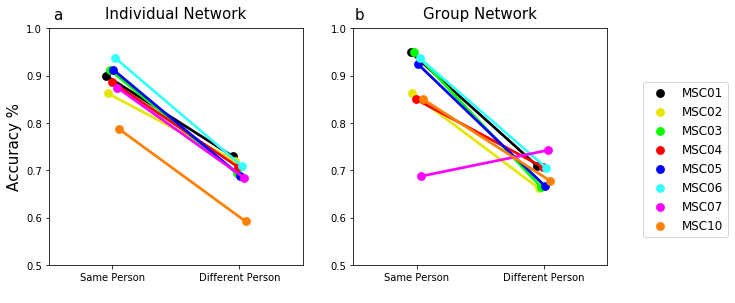

In [13]:
fig=plt.figure(figsize=(10,10), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid spahttp://localhost:8888/notebooks/analysis/code/mL_rsfMRI/Figures/FinalFigures.ipynb#ce for subplots 2 rows by 2 columns
gs = gridspec.GridSpec(nrows=2, ncols=2,wspace=.2,hspace=.3)
fig.text(.13, .893, 'a',fontsize=15)
fig.text(.55, .893, 'b',fontsize=15)
ax1=fig.add_subplot(gs[0,1])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub", ax=ax1,ci=None, data=group, dodge=.1,order=['Same Person','Different Person'],color='r', palette=['1','2','3','4','5','6','7','10'])
y=[.5,.6,.7,.8,.9,1.0]
plt.yticks(y)
plt.ylabel(" ", fontsize=15)
ax.set_title('Group Network', fontsize=15, pad=10)
plt.xlabel(' ')

plt.legend(bbox_to_anchor=(1.5, .8),loc='upper right',fontsize='large')
ax2=fig.add_subplot(gs[0,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",ax=ax2,ci=None, data=ind, dodge=.1,order=['Same Person','Different Person'],color='r', palette=['1','2','3','4','5','6','7','10'])
ax.set_title('Individual Network', fontsize=15, pad=10)
y=[.5,.6,.7,.8,.9,1.0]
plt.yticks(y)
plt.ylabel("Accuracy %", fontsize=15)
plt.xlabel(' ')
ax.legend_.remove()
plt.savefig(thisDir+'output/FigsFinal/indGroupNet_Plot.png', bbox_inches='tight')

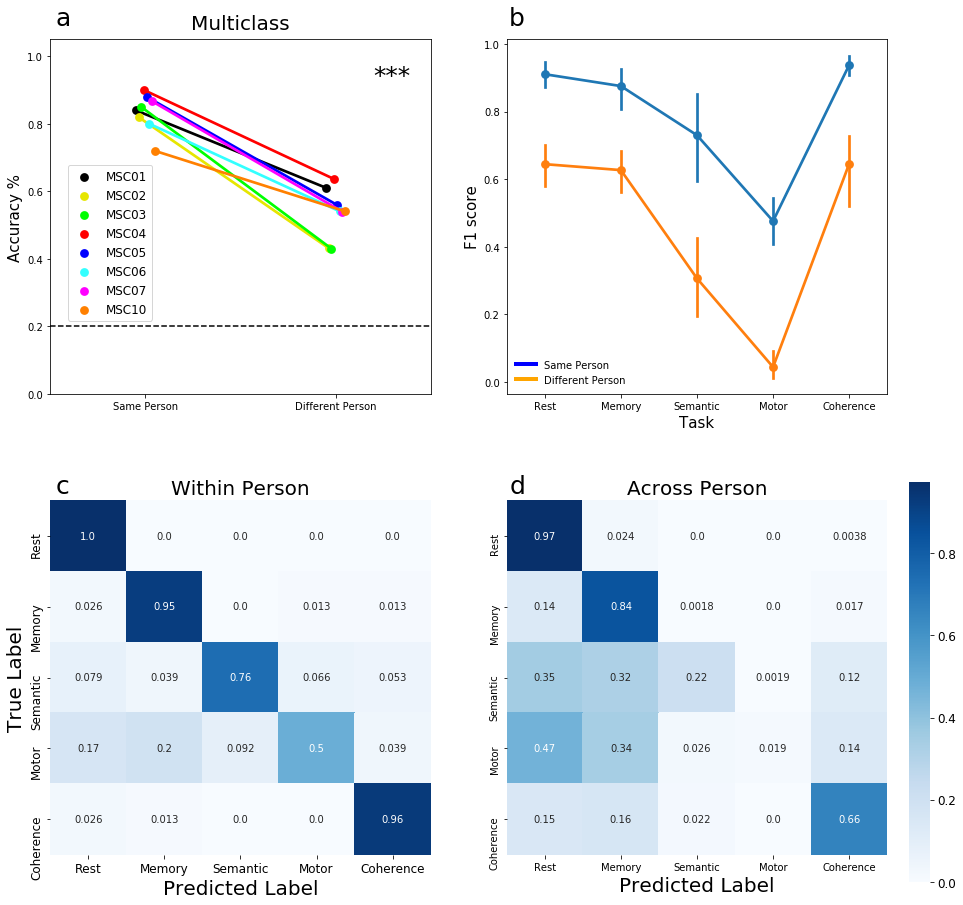

In [3]:
SS_legend_elements = [Line2D([0], [0], color='blue', lw=4, label='Same Person'),Line2D([0], [0], color='orange', lw=4, label='Different Person')]

fig=plt.figure(figsize=(15,15), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 3 columns
gs = gridspec.GridSpec(nrows=2, ncols=2, wspace=.2, hspace=.3)

fig.text(.13, .893, 'a',fontsize=25)
fig.text(.55, .893, 'b',fontsize=25)
fig.text(.13, .46, 'c',fontsize=25)
fig.text(.55, .46, 'd',fontsize=25)
ax0=fig.add_subplot(gs[0,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="train",ci=None, data=multiclass, dodge=.1,order=['Same Person','Different Person'],color='r', palette=['1','2','3','4','5','6','7','10'],ax=ax0)
plt.text(1.2, .92, '***',fontsize=25)
ax.set_title('Multiclass', fontsize=20, pad=10)
#y=[.5,.6,.7,.8,.9,1.0]
#plt.yticks(y)
plt.ylabel("Accuracy %", fontsize=15)
ax.axhline(.2,color='black',linestyle='--')
plt.legend(loc='lower left',fontsize='large',bbox_to_anchor=(.03, .19))
plt.xlabel(' ')
ax.set(ylim=(0, 1.05))
ax1=fig.add_subplot(gs[0,1])
ax=sns.pointplot(x="Task",y="f", hue="analysis",data=F1,ax=ax1)
plt.ylabel('F1 score',fontsize=15)
plt.xlabel('Task',fontsize=15)
ax.set_xticklabels(['Rest','Memory','Semantic','Motor','Coherence'])
L1=plt.legend(handles=SS_legend_elements,loc='lower left',frameon=False)

ax2=fig.add_subplot(gs[1,0])
ax=sns.heatmap(finalCV,annot=True, fmt='.2',cmap="Blues",xticklabels=["Rest","Memory","Semantic","Motor", "Coherence"],yticklabels=["Rest","Memory","Semantic","Motor", "Coherence"],ax=ax2,cbar=False)
plt.ylabel('True Label',fontsize=20)
plt.xlabel('Predicted Label',fontsize=20)
plt.title('Within Person',fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax3=fig.add_subplot(gs[1,1])
cbar_ax = fig.add_axes([.92, .1, .02, .37])
ax=sns.heatmap(finalDS,annot=True, fmt='.2',cmap="Blues",xticklabels=["Rest","Memory","Semantic","Motor", "Coherence"],yticklabels=["Rest","Memory","Semantic","Motor", "Coherence"],ax=ax3, cbar_ax=cbar_ax)
ax.set_xlabel('Predicted Label',fontsize=20)
#plt.ylabel(' ',fontsize=25)
#plt.xlabel('Predicted Label',fontsize=20)
ax.set_title('Across Person',fontsize=20)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)

plt.savefig(thisDir+'output/FigsFinal/MC_Plot.png', bbox_inches='tight')

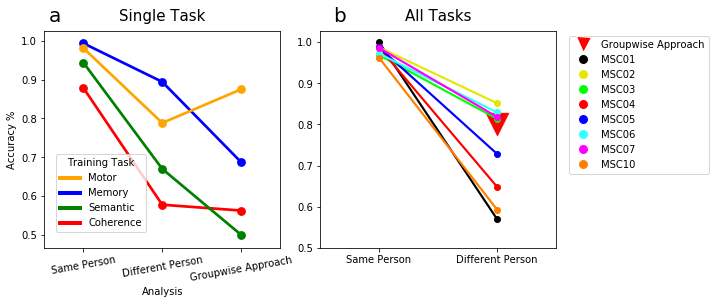

In [59]:
#Groupwise comparison
from matplotlib.lines import Line2D
import matplotlib.patches as patches
legend_elements = [Line2D([0], [0], color='w',markerfacecolor='red', marker='v',markersize=15,label='Groupwise Approach'),
                    Line2D([0], [0],  color='w',markerfacecolor=MSCdict['1'],marker='o',markersize=10,label='MSC01'),
                  Line2D([0], [0],  color='w',markerfacecolor=MSCdict['2'],marker='o',markersize=10,label='MSC02'),
                  Line2D([0], [0],  color='w',markerfacecolor=MSCdict['3'],marker='o',markersize=10,label='MSC03'),
                  Line2D([0], [0],  color='w',markerfacecolor=MSCdict['4'],marker='o',markersize=10,label='MSC04'),
                  Line2D([0], [0],  color='w',markerfacecolor=MSCdict['5'],marker='o',markersize=10,label='MSC05'),
                  Line2D([0], [0],  color='w',markerfacecolor=MSCdict['6'],marker='o',markersize=10,label='MSC06'),
                  Line2D([0], [0],  color='w',markerfacecolor=MSCdict['7'],marker='o',markersize=10,label='MSC07'),
                  Line2D([0], [0],  color='w',markerfacecolor=MSCdict['10'],marker='o',markersize=10,label='MSC10')]

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='green', lw=4),
                Line2D([0], [0], color='red', lw=4)]
fig=plt.figure(figsize=(12,4))#, constrained_layout=True)
#plt.rcParams['figure.constrained_layout.use'] = True
gs = gridspec.GridSpec(nrows=1, ncols=3,width_ratios=[2,2,1])#, wspace=0.7, hspace=0.0)#)
fig.text(.13, .91, 'a',fontsize=20)
fig.text(.46, .91, 'b',fontsize=20)

ax1=fig.add_subplot(gs[0,0])
#Split up 7 x 58760 splitting up sessions so all subjects session 1 data trained leave out one subject 1 sess test on new task 7 subjects 1 session 
ax=sns.pointplot(x='Analysis',y='acc',hue='task',data=comp_CV,order=['Same Person','Different Person','Groupwise Approach'],palette=['red','blue','orange','green'],ax=ax1)
ax.legend(custom_lines, ['Motor', 'Memory', 'Semantic','Coherence'],loc='lower left',fontsize='medium',bbox_to_anchor=(.03, .05),title='Training Task')
plt.ylabel("Accuracy %", fontsize=10)
plt.xticks(rotation=10)
ax.set_title('Single Task', fontsize=15, pad=10)


ax2=fig.add_subplot(gs[0,1])
ax2.scatter(x=1,y=mL_mean,s=500,color='r',marker="v")
#fig.text(.95, .37, 'Groupwise Approach',fontsize=10)
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",ci=None, scale=.8,data=res,order=['Same Person','Different Person'],color='r', palette=['1','2','3','4','5','6','7','10'],ax=ax2)
#plt.legend(bbox_to_anchor=(1.4, 1),fontsize='medium')

ax.set_title('All Tasks', fontsize=15, pad=10)
y=[.5,.6,.7,.8,.9,1.0]
plt.yticks(y)
plt.ylabel("")
plt.xlabel(' ')
ax.legend_.remove()





ax9= fig.add_subplot(gs[0, 2])
ax9.set_axis_off()
plt.setp(ax9.get_yticklabels(), visible=False)
plt.setp(ax9.get_xticklabels(), visible=False)
ax9.set_xticks([])
ax9.set_yticks([])
ax9.legend(handles=legend_elements)#,loc='lower left',mode='expand',ncol=3,fontsize='xx-large',frameon=False)
plt.savefig(thisDir+'output/FigsFinal/groupwise_mL_compPlot.png', bbox_inches='tight')

